# Machine Learning - Introduction
[Old version in Czech language](https://colab.research.google.com/drive/1Sug33D9dsF1c86SChm1nQsJ4wh9Nvao0?usp=sharing)

Machine Learning (ML) is a set of algorithms and techniques used to create a model based on available data. This model can then predict future behavior of a system or support decision-making in relation to the system's actions.

**Note**: Various sources may define ML differently, but its dependency on data is essential.

The term "machine learning" implies that these algorithms allow a machine to learn. But what does it mean for a machine to learn? Sometimes, ML is considered a subset of Artificial Intelligence (AI), while other times it is viewed separately. AI suggests "awareness" or "intelligence," while **ML refers to adapting models passively through data-driven algorithms**. Learning here means that a machine changes its internal states based on data, improving its ability to respond to environmental changes (to produce right output). The diagram below illustrates the relationship between AI and ML.

**Summary:**

Machine Learning (ML) creates data-driven models for prediction or decision-making.
Definitions may differ, but ML’s reliance on data is central.
ML can be viewed as a subset of Artificial Intelligence (AI).
AI implies "awareness"; ML adapts passively through data-driven algorithms.


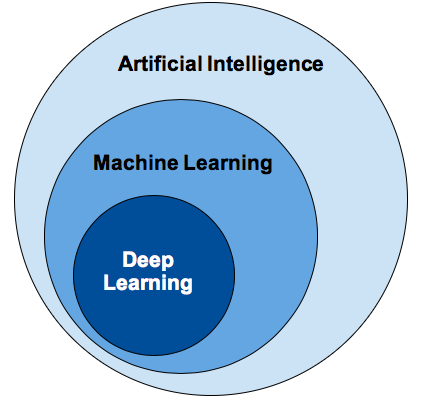

Source <https://qph.cf2.quoracdn.net/main-qimg-3ba715eff1ae5c0964e9465d5db12d99>


**Machine Learning is closely connected to several other fields:**

* Optimization - Many ML tasks can be formulated as optimization problems.
* Statistics - ML algorithms often rely on statistical principles.
* Data Mining - Focuses on extracting information from data. It frequently uses ML algorithms, but here, a human applies the algorithms to gain insights from the data.

## Key steps in a Machine Learning

1. Data Collection - gather and prepare raw data, which is the basis for training
2. Data Preprocessing - clean data to handle missing values, normalize it, and make it usable for the model
3. Feature Selection - identify the most relevant features to improve model accuracy
4. Model Selection - choose the ML algorithm suited for the task (e.g., classification, regression)
5. Training - use training data to adjust the model’s parameters and learn patterns
6. Evaluation - measure model performance with metrics like accuracy or precision on test data
7. Prediction - apply the trained model to make predictions on unseen data

Steps 3-6 in ML need to be repeated to find the optimal settings.


# Technological stack



**Data Manipulation and Analysis**:

* [Pandas](https://pandas.pydata.org/docs/index.html#module-pandas)

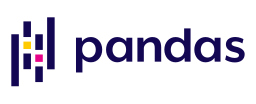

* [Numpy](https://numpy.org/)

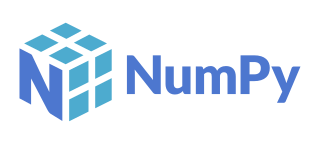

**Machine Learning Algorithms (non neural networks)**

* [scikit-learn](https://scikit-learn.org/stable/index.html) - Classical ML algorithms (e.g., regression, classification, clustering).

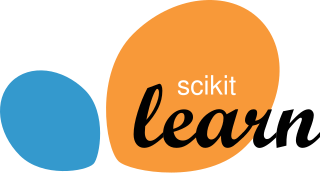

[XGBoost](https://xgboost.readthedocs.io/en/stable/) (not included in presentation)

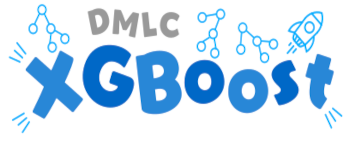

* [statsmodels](https://www.statsmodels.org/stable/index.html) (regresion models, GLM, time series + ARIMA, etc.)

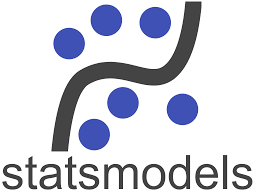

**Neural Networks Frameworks**

* [Tensorflow](https://www.tensorflow.org/) (Provide low level API + ecosystem for model training and production.)

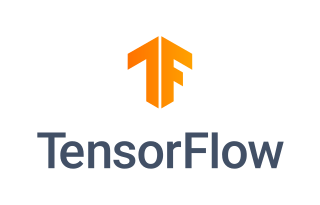

* [PyTorch](https://pytorch.org/) (https://pytorch.org/) (Provide low level API + ecosystem for model training and production.)

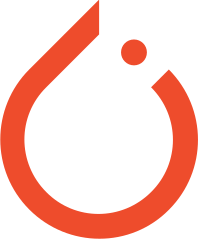

* [Keras](https://keras.io/)(High level API, part of TensorFlow)

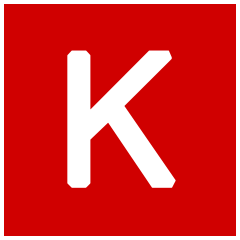

## Need more perfomance?



*   [Dask](https://www.dask.org/)(Big data, distributed arrays etc.)
*   [RAPIDS](https://rapids.ai/)(Machine learning on CUDA, NVIDIA)
    *  cuDF - GPU DataFrames accelerates pandas with the same API
    *  cuML - GPU Machine Learning Algorithms, API matches the API from scikit-learn.



# Common Machine Learning Tasks
Here are the most frequent types of tasks in Machine Learning:

* **Classification** - Assigns data points to specific classes. For example, using physical characteristics to classify individuals as either "obese" or "normal weight." The classes are predefined.

* **Regression** - Calculates a numerical value based on input parameters, such as predicting a price of house from location, size, and other factors.

* **Clustering** - Groups data points into **clusters without predefined classes.** Unlike classification, clustering aims to discover patterns or similarities within the data.

* **Anomaly Detection** - Identifies rare or unusual events, such as unauthorized credit card transactions.

* **Dimensionality Reduction** - Real-world data often contain many features, though only a subset is relevant to the model. This process selects a smaller, meaningful set of features while removing irrelevant data.

The diagram below illustrates the differences between these common ML tasks.

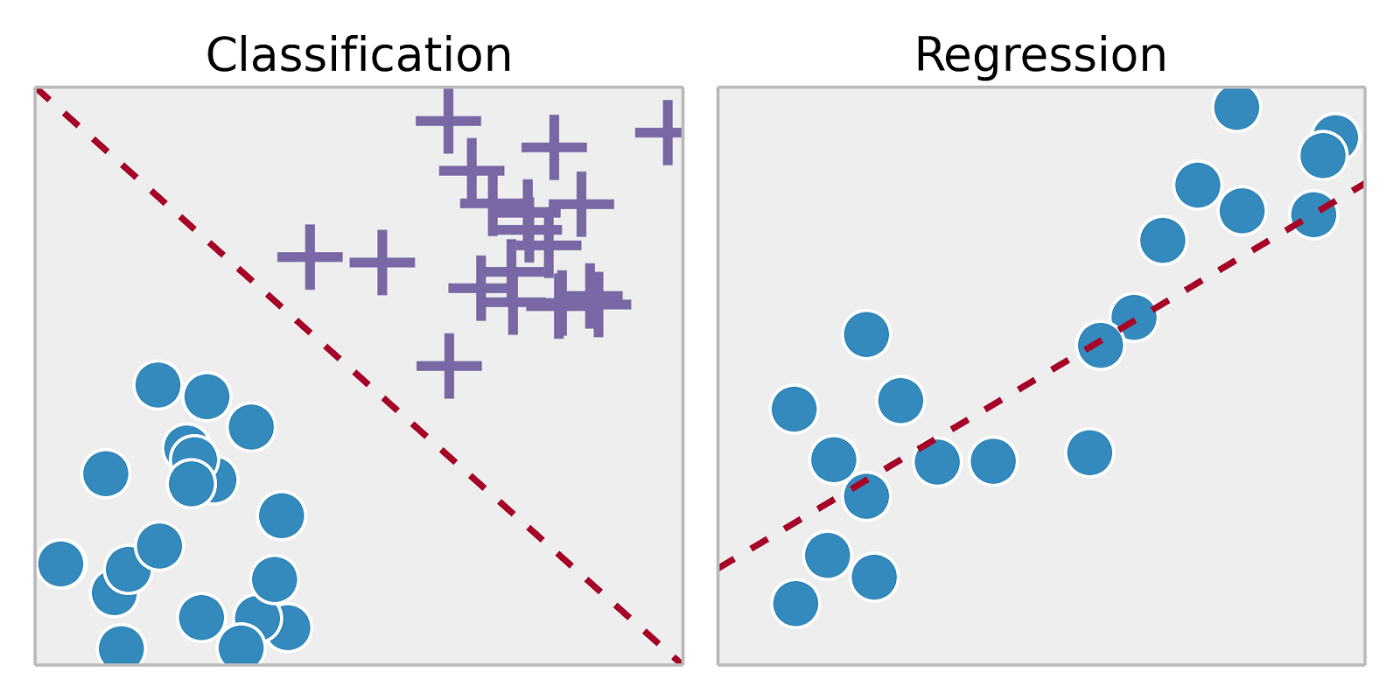

## Supervised vs. Unsupervised learning

Assuming we have data available to build a model, we can view the model as a kind of “black box” with an *internal state* represented by a set of internal parameters. Training a model means adjusting these internal parameters. Generally, models can be divided into two main groups (excluding reinforcement learning).

* **Supervised Learning** - The data includes both **input features** and the **target** (**label**) output. We adjust the model's internal parameters to produce the expected output (target). An example of this is *decision trees*.

* **Unsupervised Learning** - The model is left to discover patterns within the data independently, without access to predefined class labels. An example is the *K-means* algorithm

# Simple example from scratch

We start by generating synthetic data. We’ll consider individuals whose weight and height follow a Gaussian distribution:
\begin{equation*}
\rho(x, \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{\left(x-\mu\right)^2}{2\sigma^2}}.
\end{equation*}

Each individual can be represented as a point in the so-called feature space. In this case, the dimensions in our feature space are **height** and **weight** and **color of sweater**. We’ll also calculate the body mass index (BMI) for each individual, although BMI itself will not be used directly for decision-making.

In [ ]:
# Data Generation
import numpy as np
import pandas as pd
from numpy.random import randn

N = 1000  # Number of data points

# Generate points in the weight-height space using Gaussian distribution
# Generate weight in kg
def generate_weight(mean_weight=80, sigma_weight=12, count=100):
    weight = mean_weight + randn(count) * sigma_weight
    weight[weight < mean_weight - 4 * sigma_weight] = mean_weight - 4 * sigma_weight  # Trim unlikely low values
    weight[weight > mean_weight + 4 * sigma_weight] = mean_weight + 4 * sigma_weight  # Trim unlikely high values
    return weight

# Generate height in cm (to be converted to mm in DataFrame)
def generate_height(mean_height=180, sigma_height=15, count=100):
    height = mean_height + randn(count) * sigma_height
    height[height < mean_height - 4 * sigma_height] = mean_height - 4 * sigma_height
    height[height > mean_height + 4 * sigma_height] = mean_height + 4 * sigma_height
    return height

# Calculate Body Mass Index (BMI)
weight = generate_weight(count=N)
height = generate_height(count=N)
bmi = weight / (height / 100) ** 2
sweater = np.random.choice(["blue", "yellow", "purple"], size=N)  # Deliberate misspelling

# If BMI > 25 and sweater is not purple, label as a problem
data = {
    "height": height * 10,  # Convert to mm for DataFrame
    "weight": weight,
    "sweater": sweater,
    "danger": [b > 25 and s != "purple" for b, s in zip(bmi, sweater)]
}

df = pd.DataFrame(data)

# Introduce some missing data as a common issue
df.at[1, "weight"] = None
df.at[3, "sweater"] = None
df.at[0, "sweater"] = "yelov" # missing one l, wrong v
# Save data to CSV
df.to_csv('people_data.csv', index=False)

# Create a copy for additional operations
df_copy = df.copy()  # For further processing, demonstrating efficient handling
df.head(10)


height     weight sweater  danger
0  1820.897199  78.881026   yelov   False
1  1786.029070        NaN  purple   False
2  1957.139061  48.912106  purple   False
3  1744.182349  99.038435    None    True
4  1614.493106  68.886678  yellow    True
5  1587.459777  90.938771    blue    True
6  2019.967555  75.043951  yellow   False
7  1857.785045  80.558090  purple   False
8  1973.831929  76.681162  purple   False
9  1778.063845  84.345172    blue    True

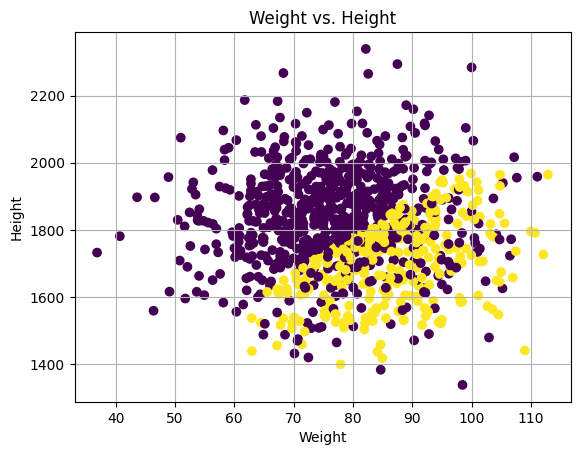

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=df.weight,y=df.height,  c=df.danger )
plt.grid()
plt.title("Weight vs. Height")
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

## Common Steps

We want to build a model that, based on the attributes **weight**, **height**, and **color of sweater** , can decide if there’s an issue (whatever that may mean in this context).

1. Check the Data - Are the data clean? If not, fix or adjust them as needed.
2. Algorithm Selection - Choose an algorithm, often influenced by the previous step (e.g., handling text values, data volume).
3. Data Splitting - Split the data into **training and test sets**: use the training set to train the model and the test set to validate performance.
 Since ML models often have various parameters, it’s beneficial to split the data into three groups:
    * training (for model learning)
    * validation (for tuning hyperparameters - extra model parameters)
    * test (for final performance evaluation).

### Data Cleaning and Preprocessing
First, I’ll clean and adjust the data.

* Remove any incorrect values – or alternatively, impute missing values (a bit more complex, see [imputers](https://scikit-learn.org/1.5/modules/impute.html)).
* Scale numerical data to a consistent range – required by certain algorithms.
* Convert categorical data to numerical format – caution not to introduce unintended information (blue=0, purple=1, but does blue < purple???). Here, I’ll use [One-hot encoding](https://en.wikipedia.org/wiki/One-hot).

#### Remove incorect values

In [ ]:
# Correct the typo in "sweater" column from "yelov" to "yellow"
df.replace({"sweater":"yelov"}, "yellow", inplace=True)
# Drop rows with missing values - in some cases, interpolation might be needed, see the data processing section for more details
df_cleaned = df.dropna()
df_cleaned.head(10)

height     weight sweater  danger
0   1820.897199  78.881026  yellow   False
2   1957.139061  48.912106  purple   False
4   1614.493106  68.886678  yellow    True
5   1587.459777  90.938771    blue    True
6   2019.967555  75.043951  yellow   False
7   1857.785045  80.558090  purple   False
8   1973.831929  76.681162  purple   False
9   1778.063845  84.345172    blue    True
10  1805.414122  60.837570  yellow   False
11  1922.993794  89.980549    blue   False

#### Coding string values - OneHot encoding

In [ ]:
# Convert the "sweater" column to numerical values using one-hot encoding - doing it from scratch
keys = set(df_cleaned["sweater"])  # Get unique keys
print(keys)
pd.set_option('mode.chained_assignment', None)  # Suppress warnings
for key in keys:
    df_cleaned[key] = (df_cleaned["sweater"] == key).astype(int)  # Create new column for each key, this may throw warnings
df_cleaned.head(10)

{'yellow', 'purple', 'blue'}


height     weight sweater  danger  yellow  purple  blue
0   1820.897199  78.881026  yellow   False       1       0     0
2   1957.139061  48.912106  purple   False       0       1     0
4   1614.493106  68.886678  yellow    True       1       0     0
5   1587.459777  90.938771    blue    True       0       0     1
6   2019.967555  75.043951  yellow   False       1       0     0
7   1857.785045  80.558090  purple   False       0       1     0
8   1973.831929  76.681162  purple   False       0       1     0
9   1778.063845  84.345172    blue    True       0       0     1
10  1805.414122  60.837570  yellow   False       1       0     0
11  1922.993794  89.980549    blue   False       0       0     1

#### Scaling data
**Scaling formula - min-max**
\begin{equation}
x_{\text{sc}} = \frac{x - x_{\min}}{x_{\max} - x_{\min}},
\end{equation}
where $x$ is weight or height.



In [ ]:
# Data normalization - scale the columns "weight" and "height" to the range <0,1>
height_norm = df_cleaned.height - df_cleaned.height.min()
height_norm = height_norm / height_norm.max()

weight_norm = df_cleaned.weight - df_cleaned.weight.min()
weight_norm = weight_norm / weight_norm.max()

df_cleaned["height_norm"] = height_norm
df_cleaned["weight_norm"] = weight_norm
df_cleaned.head(10)

height     weight sweater  danger  yellow  purple  blue  height_norm  \
0   1820.897199  78.881026  yellow   False       1       0     0     0.482559   
2   1957.139061  48.912106  purple   False       0       1     0     0.618525   
4   1614.493106  68.886678  yellow    True       1       0     0     0.276572   
5   1587.459777  90.938771    blue    True       0       0     1     0.249594   
6   2019.967555  75.043951  yellow   False       1       0     0     0.681227   
7   1857.785045  80.558090  purple   False       0       1     0     0.519372   
8   1973.831929  76.681162  purple   False       0       1     0     0.635184   
9   1778.063845  84.345172    blue    True       0       0     1     0.439812   
10  1805.414122  60.837570  yellow   False       1       0     0     0.467107   
11  1922.993794  89.980549    blue   False       0       0     1     0.584449   

    weight_norm  
0      0.552710  
2      0.158333  
4      0.421189  
5      0.711384  
6      0.502216  
7      0.574779  
8      0.523761  
9      0.624615  
10     0.315266  
11     0.698774

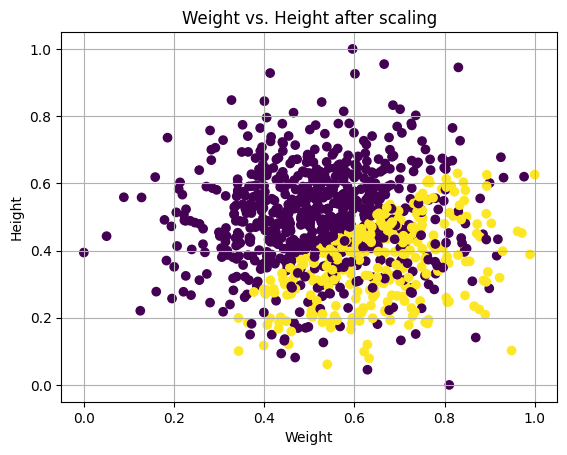

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=df_cleaned.weight_norm,y=df_cleaned.height_norm,  c=df_cleaned.danger )
plt.grid()
plt.title("Weight vs. Height after scaling")
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

#### Classification Using the K-NN Method (from scratch)

To illustrate, I will use the K-Nearest Neighbors (K-NN) algorithm.

* Select the number **k** of nearest neighbors, to consider for classification.
* Calculate Distances: For a new data point, calculate its distance to all other points in the dataset.
* Identify Neighbors: Select the k points closest to the new point (based on calculated distances).
* Classify: Assign the new point to the class most common among these k neighbors.

**Remark**
Since we’ve already scaled the data, the axes now have consistent units, so differences along each dimension are weighted equally. This is important for algorithms that rely on distances, ensuring that the model doesn’t favor one feature over another due to different scales.

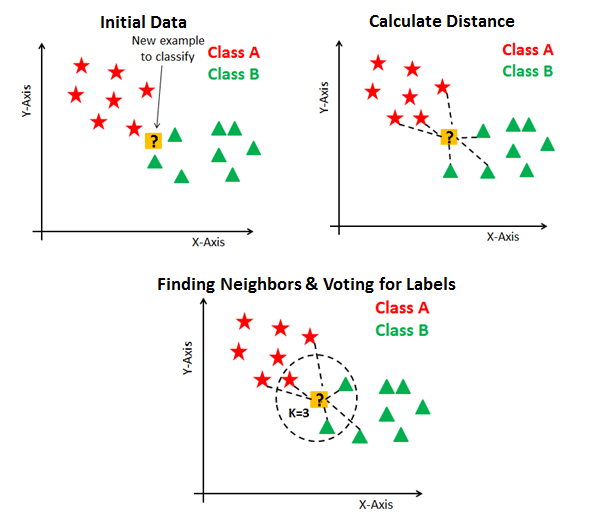

In [ ]:
# Create a simple KNN function - a basic implementation.
def knn_classify(X, y, x, k=3):
    """
    :param X: Input matrix of elements, each row is one record - training data
    :param y: Labels for the training data
    :param x: Element we want to classify
    :param k: Number of neighbors
    :return: Class label (number)
    """
    def distance(x, y):
      """Euklidean distance between two vectors"""
      return np.sum((x - y) ** 2)

    # Determine the distance table - store the distance from x and label for each element in X
    table = np.array([(distance(x, row), label) for row, label in zip(X[:], y)])

    # Find the k-nearest elements. Similar to selection sort.
    for step in range(k):
        index = np.argmin(table[step:, 0], axis=0) + step
        table[[step, index]] = table[[index, step]]

    # Determine the frequency of labels for the k-nearest neighbors - first k in the table
    frequencies = {}
    for label in table[:k, 1]:  # only iterates over the label column
        if label in frequencies:
            frequencies[label] += 1
        else:
            frequencies[label] = 1

    # Return the key corresponding to the most frequent label
    return int(sorted(frequencies.items(), key=lambda kv: kv[1])[-1][0])


#### Splitting Data into Training and Test Sets

In [ ]:
# Select only the columns I need and use a NumPy array (pandas -> numpy array)
X = df_cleaned[["blue", "yellow", "purple", "height_norm", "weight_norm"]].values
y = df_cleaned["danger"].values # target

# Randomly shuffle the data
index = np.array([i for i in range(len(y))])
np.random.shuffle(index)
print(f"Example of randomly shuffled 10 indexes: {index[:10]}")

# Take 80% for training the model
training_index = int(len(index) * 0.80)  # Take 80% for model training
X_train = X[:training_index, :]  # Get the corresponding rows and all columns
y_train = y[:training_index]
X_test = X[training_index:, :]
y_test = y[training_index:]

Example of randomly shuffled 10 indexes: [445   2 839 163 266  54 169 637 394 226]


#### Classification result

Correctly classified: 100.00% (200 values)
Incorrectly classified: 0.00% (0 values)


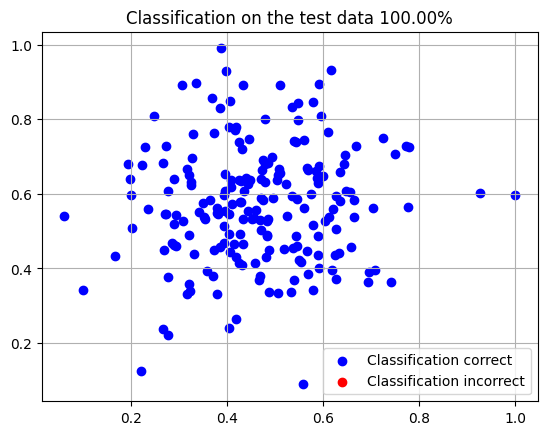

In [ ]:
# Learning the model
y_hat = [knn_classify(X_train, y_train, element) for element in X_test]

# Calculate the number of correct and incorrect classifications
correct = np.sum(y_hat == y_test)
incorrect = np.sum(y_hat != y_test)
total = len(y_test)

# Calculate percentages
accuracy = (correct / total) * 100
error_rate = (incorrect / total) * 100

# Print the results
print(f"Correctly classified: {accuracy:.2f}% ({correct} values)")
print(f"Incorrectly classified: {error_rate:.2f}% ({incorrect} values)")

# Plotting results
plt.title(f"Classification on the test data {accuracy:.2f}%")
plt.scatter(X_test[y_hat == y_test, 3], X_test[y_hat == y_test, 4], c="blue", label="Classification correct")
plt.scatter(X_test[y_hat != y_test, 3], X_test[y_hat != y_test, 4], c="red", label="Classification incorrect")
plt.grid()
plt.legend()

#### Evaluation of Results

To measure how well the classifier performs, we need to know the counts of correctly and incorrectly classified instances. This is elegantly expressed by the so-called [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix). It is important to note that different sources may present this matrix in various orientations, with the diagonal often rotated or columns swapped.

<table>
  <tr>
   <th> </th>
    <th colspan="3">Reality</th>
  </tr>
  <tr>
  <th rowspan="4">Classifier</th>
  </tr>
  <tr>
   <td> </td>
    <th>Positive (1)</th>
    <th>Negative (0)</th>
  </tr>
  <tr>
    <th>Positive (1)</th>
    <td> TP </td>
    <td> FP </td>
  </tr>
  <tr>
    <th>Negative (0)</th>
    <td> FN </td>
    <td> TN </td>
  </tr>
</table>

*   **TP** - number of positives that the classifier correctly labeled (*True Positive*)
*   **TN** - number of negatives that the classifier correctly labeled (*True Negative*)
*   **FP** - actually negative, but the classifier labeled them as positive (*False Positive*)
*   **FN** - actually positive, but the classifier labeled them as negative (*False Negative*)


In [ ]:
# Initialize the confusion matrix
confusion_matrix = np.array([[0, 0], [0, 0]])
# Determine the confusion matrix - positive are those with value True, negative with value False
for predicted, actual in zip(y_hat, y_test):  # Compare element by element
    if predicted == actual:  # Match
        if predicted == 1:  # Class 1 - positive
            confusion_matrix[0, 0] += 1  # Increase TP
        else:
            confusion_matrix[1, 1] += 1  # Increase TN
    else:
        if predicted == 1:  # Classifier says 1, but reality is 0
            confusion_matrix[0, 1] += 1  # Increase FP
        else:
            confusion_matrix[1, 0] += 1  # Increase FN

print(f"Confusion matrix:\n {confusion_matrix}")

Confusion matrix:
 [[ 67   0]
 [  0 133]]


### Classification evaluation

Let’s introduce some metrics for evaluating classification and their significance. We denote the total number of positives (class 1) by $P$
and the total number of negatives (class 0) by
$N$. It holds that $P=TP+FN$, meaning $P$ is the sum of the first column of the confusion matrix. Similarly, $N=TN+FP$, which is the sum of the second column of the confusion matrix.

**Sensitivity** (True Positive Rate, recall) indicates the proportion of the total number of positives that are correctly identified as positive by the classifier.
\begin{equation}
TPR = \frac{TP}{P}=\frac{TP}{TP+FN}.
\end{equation}

**Specificity** (True Negative Rate) indicates the proportion of the total number of negatives that are correctly identified as negative by the classifier.
\begin{equation}
TNR = \frac{TN}{N} = \frac{TN}{TN+FP}.
\end{equation}


Precision (also known as Positive Predictive Value) is calculated as:
\begin{equation}
Precision=\frac{TP}{TP+FP}.
\end{equation}

Suppose we have a classifier that determines whether someone is infected (positive test = class 1, negative test = class 0). Sensitivity tells us what **percentage of the truly positive cases are detected by this test**, while **specificity tells us what percentage of the truly negative cases are labeled as negative by this test**.

**Remark**:
 *In the case that we perform a test that labels everything as positive (FN = 0, TN = 0), its sensitivity would be 100%, but unfortunately, specificity would be zero. Conversely, a test that labels everything as healthy (negative) (TP = 0, FP = 0) has zero sensitivity and 100% specificity.*

 Next, we can introduce the **False Positive Rate**:
\begin{equation}
FPR = \frac{FP}{N} = 1 - TNR,
\end{equation}
which represents the portion of negatives that are classified as positive by the classifier.


Another metric is **accuracy**, which indicates the overall ratio of correctly identified classes:
\begin{equation}
ACC = \frac{TP+TN}{P+N}.
\end{equation}


In [ ]:
# Simple GUI for calculating basic metrics and for custom experimentation
from ipywidgets import Button, GridBox, Layout, ButtonStyle, BoundedIntText, Output

tp_widget = BoundedIntText(description='TP',  # True Positives
            layout=Layout(width='auto', grid_area='tp_widget'),
            value=80, min=0, max=1000, step=1, disabled=False)
fp_widget = BoundedIntText(description='FP',  # False Positives
            layout=Layout(width='auto', grid_area='fp_widget'),
            value=40, min=0, max=1000, step=1, disabled=False)

fn_widget = BoundedIntText(description='FN',  # False Negatives
            layout=Layout(width='auto', grid_area='fn_widget'),
            value=20, min=0, max=1000, step=1, disabled=False)
tn_widget = BoundedIntText(description='TN',  # True Negatives
            layout=Layout(width='auto', grid_area='tn_widget'),
            value=60, min=0, max=1000, step=1, disabled=False)

calculate_button = Button(description='Calculate',  # Button to calculate metrics
                 layout=Layout(width='auto', grid_area='calculate'),
                 style=ButtonStyle(button_color='olive'))

def on_button_clicked(b):
    tp = tp_widget.value
    tn = tn_widget.value
    fp = fp_widget.value
    fn = fn_widget.value

    tpr = tp / (tp + fn)  # True Positive Rate
    tnr = tn / (tn + fp)  # True Negative Rate
    acc = (tp + tn) / (tp + fp + tn + fn)  # Accuracy
    precision = tp / (tp + fp)  # Positive Predictive Value
    fpr = fp / (tn + fp)  # False Positive Rate

    print("-" * 80)
    print(f"The test detects {100 * tpr:.2f}% of all positives (sensitivity).")
    print(f"The test detects {100 * tnr:.2f}% of all negatives (specificity).")
    print(f"Precision: {100 * precision:.2f}% of all labeled positives are truly positive (precision).")
    print(f"Overall, {100 * acc:.2f}% of samples are classified correctly (accuracy).")

    print("-" * 80)

calculate_button.on_click(on_button_clicked)

GridBox(children=[tp_widget, fp_widget, fn_widget, tn_widget, calculate_button],
        layout=Layout(
            width='50%',
            grid_template_rows='auto auto auto',
            grid_template_columns='45% 10% 45%',
            grid_template_areas='''
            "tp_widget . fp_widget "
            "fn_widget . tn_widget"
            "calculate calculate calculate"
            ''')
       )


GridBox(children=(BoundedIntText(value=80, description='TP', layout=Layout(grid_area='tp_widget', width='auto'…

#Once More, and a Bit Better

 We will use the sklearn library and pandas dataframes.

**Cleaning and coding**

In [ ]:
# Data cleaning and conversion of nominal variables
df_copy.replace({"sweater":"yelov"}, "yellow", inplace=True)  # remove typo for "yelov"
df_cleaned = df_copy.dropna()  # remove invalid data - sometimes it's necessary/possible to interpolate missing entries
data_adjusted = pd.get_dummies(df_cleaned["sweater"])  #!!!! use pandas for one-hot encoding
for column in df_cleaned.columns:
    if column != "sweater":
        data_adjusted[column] = df_cleaned[column]
data_adjusted
data_adjusted.head(10)

blue  purple  yellow       height     weight  danger
0   False   False    True  1820.897199  78.881026   False
2   False    True   False  1957.139061  48.912106   False
4   False   False    True  1614.493106  68.886678    True
5    True   False   False  1587.459777  90.938771    True
6   False   False    True  2019.967555  75.043951   False
7   False    True   False  1857.785045  80.558090   False
8   False    True   False  1973.831929  76.681162   False
9    True   False   False  1778.063845  84.345172    True
10  False   False    True  1805.414122  60.837570   False
11   True   False   False  1922.993794  89.980549   False

**Train & Test split**

In [ ]:
from sklearn.model_selection import train_test_split  # for splitting data
# one line of code
train_data, test_data = train_test_split(data_adjusted, test_size=0.2, random_state=42)  # split the data into training and testing sets, set random_state to seed the random number generator for reproducibility
train_data.head()

blue  purple  yellow       height      weight  danger
745  False   False    True  1843.581283   75.183863   False
288   True   False   False  1790.402603  110.710187    True
167   True   False   False  1610.595542   67.442038    True
961   True   False   False  1981.871466   88.466171   False
495  False    True   False  1814.975570   89.523020   False

**Extracting height and weight and normalization**

In [ ]:
# Scaling data and preparing it for model input
from sklearn.preprocessing import MinMaxScaler  # Not ideal for data with outliers

scaler = MinMaxScaler() # create instance of scaler, default feature_range=(0, 1)
x_tr_sc = scaler.fit_transform(train_data[["height", "weight"]])  # Find min/max on training data and scale
x_test_sc = scaler.transform(test_data[["height", "weight"]])  # Scale test data, using min/max from training data

# Creating matrix X_tr for model input
X_tr = np.concatenate((x_tr_sc, train_data[["purple", "blue", "yellow"]]), axis=1)  #
y_tr = train_data["danger"].values

# Same preparation for test data
X_test = np.concatenate((x_test_sc, test_data[["purple", "blue", "yellow"]]), axis=1)  #
y_test = test_data["danger"].values
print(X_tr)

[[0.50519716 0.50932816 0.         0.         1.        ]
 [0.45212606 0.98172683 0.         1.         0.        ]
 [0.27268274 0.40638399 0.         1.         0.        ]
 ...
 [0.5845934  0.66919806 0.         1.         0.        ]
 [0.5234253  0.54751816 0.         1.         0.        ]
 [0.3964758  0.71241549 0.         1.         0.        ]]


**Train model and predict**

In [ ]:
# Custom classification: changing the model essentially only requires modifying one line
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)  # Default number of neighbors is 5
model.fit(X_tr, y_tr) # fit model
y_hat = model.predict(X_test)  # To get "probabilities," use model.predict_proba()
score = model.score(X_test, y_test)  # Accuracy
print(f"Score: {score}")

Score: 0.99


**Results**

              precision    recall  f1-score   support

       False       0.99      0.99      0.99       139
        True       0.98      0.98      0.98        61

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200

Confusion matrix using sklearn:
138|  1
  1| 60


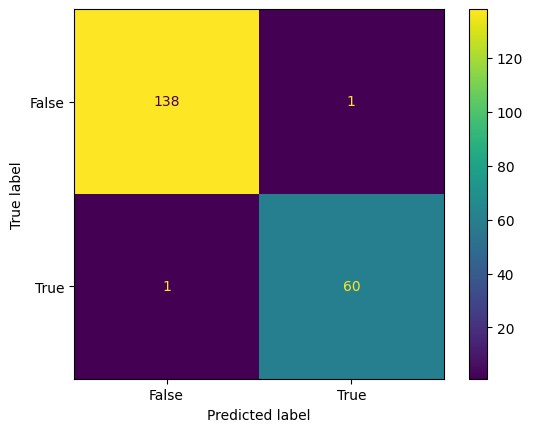

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test, y_hat))
cm = confusion_matrix(y_test, y_hat)
tn, fp, fn, tp = cm.ravel()
print("Confusion matrix using sklearn:")  # Note: the matrix is transposed to match the image orientation
print(f"{tn:3}|{fp:3}")
print(f"{fn:3}|{tp:3}")

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["False", "True"])  # Display plot
disp.plot()

# Scikit-learn & ML algorithms

[Here](https://scikit-learn.org/1.5/supervised_learning.html) is a general list of commonly used supervised algorithms in scikit-learn for classification and regression tasks (and also for other task e.g. clustering etc.) This is only a partial list:

**Classification Algorithms:**
* [Logistic Regression](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html)
* [K-Nearest Neighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)(K-NN)
* [Decision Trees](https://scikit-learn.org/1.5/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) and [Random Forests](https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)
* [Support Vector Machines](https://scikit-learn.org/1.5/modules/svm.html) (SVM) - [SVC](https://scikit-learn.org/1.5/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC), [LinearSVC](https://scikit-learn.org/1.5/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)
* [Naive Bayes](https://scikit-learn.org/1.5/modules/naive_bayes.html) - different types
* ... gazillion other algorithms - e.g. [Gradient Boosted Tree](https://scikit-learn.org/dev/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)

**Regression Algorithms:**
*  [Linear Regression](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LinearRegression.html)
* [Ridge](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.Ridge.html) and [Lasso Regression](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.Ridge.html)
* [K-Nearest Neighbors Regression](https://scikit-learn.org/1.5/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)
* [Regression Trees](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) and [Random Forests Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)
* [Support Vector Machines for Regression](https://scikit-learn.org/1.5/modules/generated/sklearn.svm.SVR.html) (SVR)
* ... many other algorithms


## Scikit-learn interface


### Estimators (ML models)

In scikit-learn, all models follow a [standard interface](https://scikit-learn.org/1.5/developers/develop.html), which simplifies the process of training, predicting, and evaluating across various algorithms. The interface consists of a few core methods that apply uniformly across all models, regardless of whether they are used for classification, regression, or clustering tasks.

**You can implement a custom classifier**, but it’s recommended that it follows this interface for consistency and compatibility within scikit-learn’s framework.

* *.fit(X, y)*: This method trains the model on data. X represents the input data, typically structured as a 2D array or DataFrame with each row as a sample and each column as a feature. y represents the target values, which are labels for classification or continuous values for regression.

* *.predict(X)*: After a model has been trained, .predict() generates predictions based on new input data. It returns predictions in a format consistent with the training labels y.

* *.predict_proba(X)*: For classifiers that support probability estimates, .predict_proba() returns an array of probabilities for each class.

* *.score(X, y)*: This method provides a quick measure of the model’s accuracy or performance. For classifiers, it calculates the proportion of correctly predicted samples. For regression models, it returns the $R^2$  score.

* *.get_params() and .set_params(**params)* provide a way to access and adjust the model's parameters.

### Interface for data transformation
[Transformers](https://scikit-learn.org/1.5/data_transforms.html) are used to preprocess data (e.g., scaling, encoding, and feature extraction), and they follow a standard interface similar to classifiers:

* *fit(X, y=None)*: Learns parameters from the data X, returning the transformer instance for method chaining.

* *transform(X)*: Applies the learned transformation to new data X.

* *fit_transform(X, y=None)*: Combines fit and transform in one step for training data.

* *inverse_transform(X)*: (Optional) Reverses the transformation applied by transform().

* *get_params() and set_params(**params)*: Allows inspection and modification of transformer parameters.

# Examples

## MNIST Classification and Overfitting

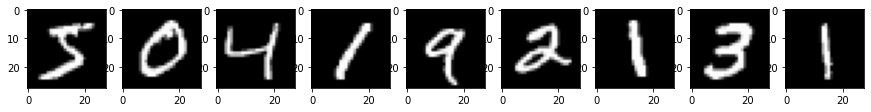

* The [MNIST](https://en.wikipedia.org/wiki/MNIST_database) dataset is a collection of handwritten digits.
* The goal is to categorize the digits into their corresponding categories.
* The images are 28x28 pixels.
* For our task, we will use a reduced dataset available in the sklearn library, resized to 8x8 pixels.
* We will skip normalization/standardization of the dataset and use the algorithm's default settings.


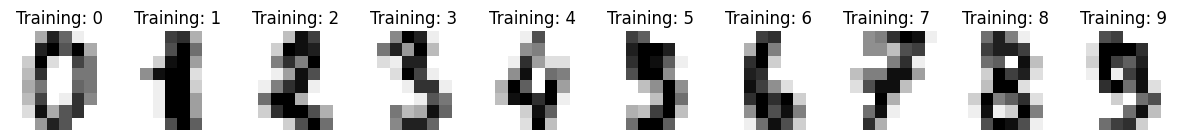

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Loading the dataset
digits = datasets.load_digits()

# Taken from sklearn - visualization of digits
fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(15, 4))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

# Preparing the dataset - converting 8x8 images to vectors
samples_count = len(digits.images)
data = digits.images.reshape((samples_count, -1))

# Splitting into individual sets; for reproducibility, we set the random state - random_state, so that it will be the same on every run
X_tr, X_test, y_tr, y_test = train_test_split(data, digits.target, test_size=0.2, shuffle=True, random_state=42)


In [ ]:
# Training the decision tree and performing classification on the training data
model_tree = tree.DecisionTreeClassifier()
model_tree.fit(X_tr, y_tr)
predicted = model_tree.predict(X_tr)

print(f"Classification report on training data {model_tree}:\n{metrics.classification_report(y_tr, predicted)}")

Classification report on training data DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       145
           1       1.00      1.00      1.00       154
           2       1.00      1.00      1.00       144
           3       1.00      1.00      1.00       149
           4       1.00      1.00      1.00       135
           5       1.00      1.00      1.00       135
           6       1.00      1.00      1.00       146
           7       1.00      1.00      1.00       145
           8       1.00      1.00      1.00       144
           9       1.00      1.00      1.00       140

    accuracy                           1.00      1437
   macro avg       1.00      1.00      1.00      1437
weighted avg       1.00      1.00      1.00      1437



**perfect results on training data, but ...**

In [ ]:
# Performing classification on the test data - it's worse
predicted = model_tree.predict(X_test)
print(f"Classification report on test data {model_tree}:\n{metrics.classification_report(y_test, predicted)}")

Classification report on test data DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.94      0.88      0.91        33
           1       0.85      0.79      0.81        28
           2       0.90      0.79      0.84        33
           3       0.86      0.88      0.87        34
           4       0.80      0.93      0.86        46
           5       0.89      0.85      0.87        47
           6       0.86      0.91      0.89        35
           7       0.91      0.88      0.90        34
           8       0.74      0.67      0.70        30
           9       0.81      0.88      0.84        40

    accuracy                           0.85       360
   macro avg       0.85      0.85      0.85       360
weighted avg       0.85      0.85      0.85       360



By comparing the results, it is evident that the classifier performs worse on the test data.

**Homework**
1. Investigate the impact of setting the *maximum depth* of the tree.
2. Explore the effect of using different *impurity* criteria (Gini, entropy), refer to the [sklearn documentation](https://scikit-learn.org/1.5/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier).
3. Examine the impact of the dataset normalization and standardization.

### Task 1

 Which digits are most frequently confused with each other?

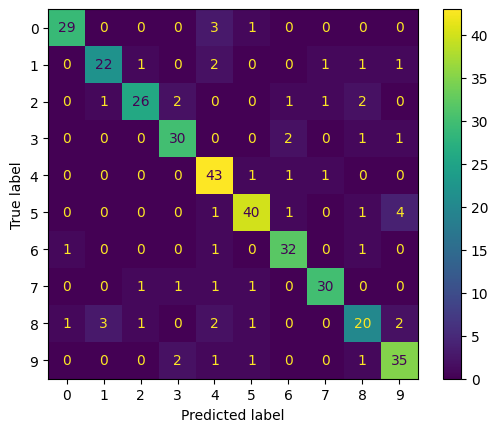

In [ ]:
# confusion matrix
cm = confusion_matrix(y_test, predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

###Using Random Forest

Random Forest classifiers **are more effective at preventing overfitting** due to their ensemble approach, which combines the predictions of multiple decision trees to improve generalization on unseen data.

In [ ]:
# MNIST classification using Random Forest
from sklearn import metrics, tree
from sklearn.ensemble import RandomForestClassifier # for random forest
# Creating and training the classifier
forest = RandomForestClassifier(n_estimators=20)
forest = forest.fit(X_tr, y_tr)
# Making predictions and evaluating them
predicted = forest.predict(X_test)
print(f"Classification report on test data {forest}:\n{metrics.classification_report(y_test, predicted)}")


Classification report on test data RandomForestClassifier(n_estimators=20):
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        33
           1       0.93      1.00      0.97        28
           2       1.00      1.00      1.00        33
           3       1.00      0.94      0.97        34
           4       0.98      1.00      0.99        46
           5       0.96      0.96      0.96        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.93      0.93      0.93        30
           9       0.95      0.95      0.95        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



### Task 2

Use SVM for MNIST digit classification. What accuracy did you achieve on testing data?


In [ ]:
# Solution
from sklearn import svm
model_svm = svm.SVC() # default setting
model_svm.fit(X_tr, y_tr)
y_hat_tr = model_svm.predict(X_tr)
y_hat_test = model_svm.predict(X_test)
print(f"Classification report on train data {model_svm}:\n{metrics.classification_report(y_tr, y_hat_tr)}")
print(f"Classification report on test data {model_svm}:\n{metrics.classification_report(y_test, y_hat_test)}")

Classification report on train data SVC():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       145
           1       0.99      1.00      0.99       154
           2       1.00      1.00      1.00       144
           3       0.99      1.00      1.00       149
           4       1.00      1.00      1.00       135
           5       0.99      0.99      0.99       135
           6       1.00      1.00      1.00       146
           7       1.00      1.00      1.00       145
           8       1.00      0.99      0.99       144
           9       0.99      0.99      0.99       140

    accuracy                           1.00      1437
   macro avg       1.00      1.00      1.00      1437
weighted avg       1.00      1.00      1.00      1437

Classification report on test data SVC():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00    

## Task 3

[Here](https://drive.google.com/file/d/1Azaqu2hmDGFjMtLX8LYV6yNa_aOhoBsO/view?usp=drive_link) is gallaxy dataset. We are given a dataset containing over 53,000 astronomical observations of space objects. The dataset includes 15 measured features and a class label that categorizes each object into one of three classes: **galaxy**, **star**, or **quasar**.
We perform data data sanitization and remove non valid values (I did it in advance because it takes some time).

Do:
1. Transform the "class" column into numbers.
2. Check (draw) distributions of the classes
3. **Homework** Classes are disbalanced. Try to random subsample class 0 (GALAXY) to have a more balanced dataset.
4. Compute and draw [correlation matrix](https://en.wikipedia.org/wiki/Correlation) (use [df.corr()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) and [seeaborn heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)).
5. Create a classification model [Multi-layer Perceptron](https://scikit-learn.org/1.5/modules/neural_networks_supervised.html) and use the 5 most correlated features with the **class_enc**. See bellow.


In [ ]:
import pandas as pd

df = pd.read_csv('https://drive.google.com/uc?export=download&id=1Azaqu2hmDGFjMtLX8LYV6yNa_aOhoBsO')
df.set_index('obj_ID', inplace=True)
df.head()

alpha      delta         u         g         r         i  \
obj_ID                                                                        
1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501  19.16573   
1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444  21.16812   
1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976  19.34857   
1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162  20.50454   
1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747  15.97711   

                     z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
obj_ID                                                                      
1.237661e+18  18.79371  3606.0     301.0      2.0      79.0  6.543777e+18   
1.237665e+18  21.61427  4518.0     301.0      5.0     119.0  1.176014e+19   
1.237661e+18  18.94827  3606.0     301.0      2.0     120.0  5.152200e+18   
1.237663e+18  19.25010  4192.0     301.0      3.0     214.0  1.030107e+19   
1.237680e+18  15.54461  8102.0     301.0      3.0     137.0  6.891865e+18   

               class  redshift    plate      MJD  fiber_ID  
obj_ID                                                      
1.237661e+18  GALAXY  0.634794   5812.0  56354.0     171.0  
1.237665e+18  GALAXY  0.779136  10445.0  58158.0     427.0  
1.237661e+18  GALAXY  0.644195   4576.0  55592.0     299.0  
1.237663e+18  GALAXY  0.932346   9149.0  58039.0     775.0  
1.237680e+18  GALAXY  0.116123   6121.0  56187.0     842.0

In [ ]:
print("Basic information about the dataset")
print('-----------------------------')
print("Number of samples", len(df))

# Some values have an incorrect data type
# We'll try to identify them and mask them as NaN
numerical = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15]  # numerical columns
df.iloc[:, numerical] = df.iloc[:, numerical].replace('None', np.nan)
df.iloc[:, numerical] = df.iloc[:, numerical].astype(float)
print(f"Number of invalid (null) values in each column : {len(df[df.isnull().any(axis=1)])}")

# Dropping rows containing NaN
df.dropna(inplace=True)
print(f"Sanitization done. Number of invalid (null) values in each column : {len(df[df.isnull().any(axis=1)])}")


Basic information about the dataset
-----------------------------
Number of samples 53341
Number of invalid (null) values in each column : 5
Sanitization done. Number of invalid (null) values in each column : 0


In [ ]:
# Solution
# Encoding the class text values (GALAXY, STAR, etc.) to numerical values
print('Encoding values')
print('---------------')
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
# Let the encoder learn the data (identify the classes)
encoder.fit(df['class'])
# Insert a new column into the dataset with the encoded class values
df['class_enc'] = encoder.transform(df['class'])
df.head()

Encoding values
---------------


alpha      delta         u         g         r         i  \
obj_ID                                                                        
1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501  19.16573   
1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444  21.16812   
1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976  19.34857   
1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162  20.50454   
1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747  15.97711   

                     z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
obj_ID                                                                      
1.237661e+18  18.79371  3606.0     301.0      2.0      79.0  6.543777e+18   
1.237665e+18  21.61427  4518.0     301.0      5.0     119.0  1.176014e+19   
1.237661e+18  18.94827  3606.0     301.0      2.0     120.0  5.152200e+18   
1.237663e+18  19.25010  4192.0     301.0      3.0     214.0  1.030107e+19   
1.237680e+18  15.54461  8102.0     301.0      3.0     137.0  6.891865e+18   

               class  redshift    plate      MJD  fiber_ID  class_enc  
obj_ID                                                                 
1.237661e+18  GALAXY  0.634794   5812.0  56354.0     171.0          0  
1.237665e+18  GALAXY  0.779136  10445.0  58158.0     427.0          0  
1.237661e+18  GALAXY  0.644195   4576.0  55592.0     299.0          0  
1.237663e+18  GALAXY  0.932346   9149.0  58039.0     775.0          0  
1.237680e+18  GALAXY  0.116123   6121.0  56187.0     842.0          0

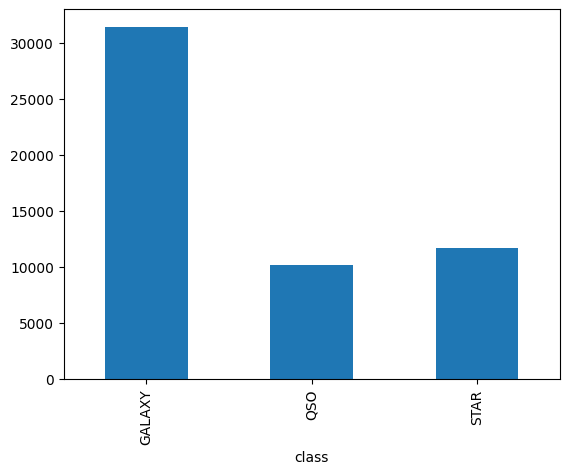

class
GALAXY    31414
QSO       10213
STAR      11709
Name: class, dtype: int64

In [ ]:
# Draw class distribution
import matplotlib.pyplot as plt
classes = df.groupby('class')['class'].count()
classes.plot(kind='bar')
plt.show()
classes.head()

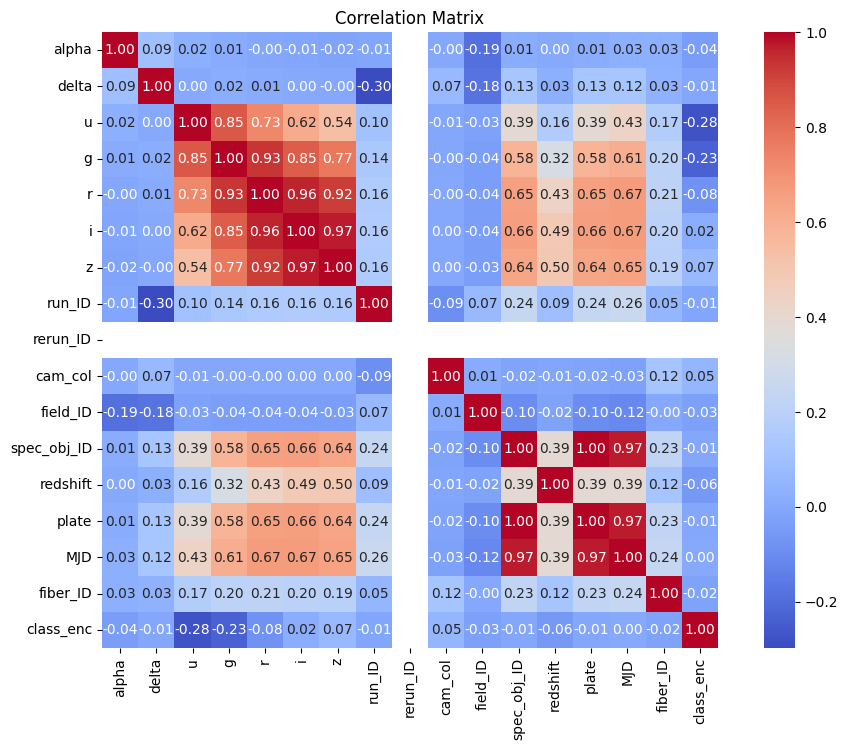

In [ ]:
# Draw correlation matrix

import matplotlib.pyplot as plt
import seaborn as sns
# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Plot the correlation matrix
plt.figure(figsize=(12, 8))  # Set the size of the figure
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title("Correlation Matrix")  # Set the title of the plot
plt.show()  # Display the plot

**Only some of the features are important**

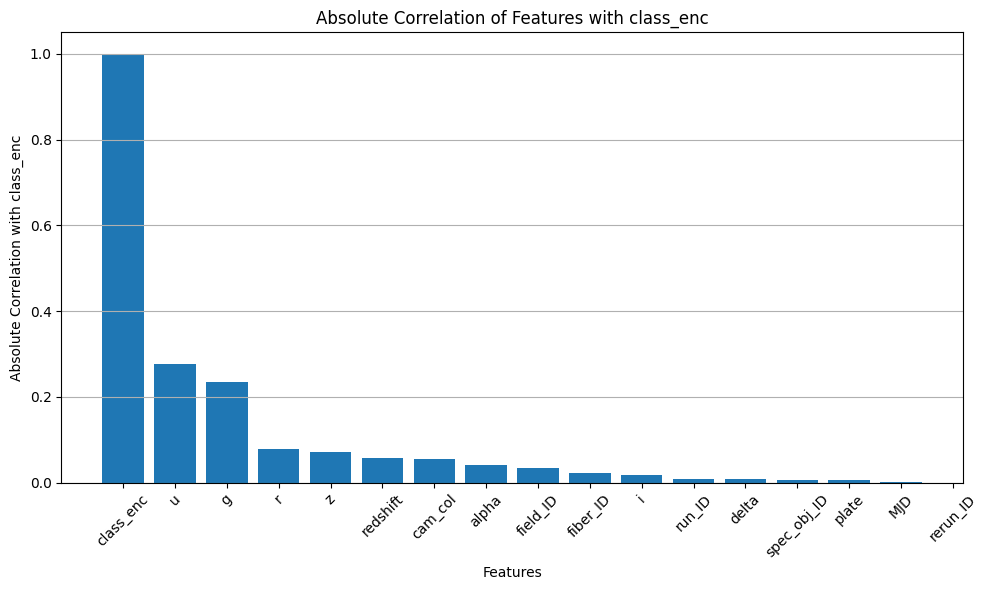

In [ ]:
import matplotlib.pyplot as plt

# Compute absolute correlations and sort them
abs_corr = correlation_matrix['class_enc'].abs().sort_values(ascending=False)

# Create a bar plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(abs_corr.index, abs_corr.values)
plt.xlabel('Features')
plt.ylabel('Absolute Correlation with class_enc')
plt.title('Absolute Correlation of Features with class_enc')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Take best 5 features
top_features = ['u', 'g', 'r', 'z', 'redshift']

# Split the dataset into X (features) and y (labels)
df_X = df[top_features]
df_y = df['class_enc'][df.index == df_X.index]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

# Create and fit the MLP classifier - 50 units with ReLu default, see https://scikit-learn.org/1.5/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(50,), max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = mlp_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      6379
           1       0.95      0.90      0.92      2001
           2       0.96      1.00      0.98      2288

    accuracy                           0.96     10668
   macro avg       0.96      0.96      0.96     10668
weighted avg       0.96      0.96      0.96     10668

Accuracy Score: 0.963254593175853


## Hyperparameter Tuning

**Hyperparameters are settings or configurations that govern the behavior of the learning algorithm.** They are set before the learning process begins, unlike model parameters which are learned from the data.

Let's demonstrate [hyperparameter tuning](https://scikit-learn.org/stable/modules/grid_search.html) via **grid search** using the [Wine dataset](https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_wine.html) from the sklearn library. The Wine dataset is a classic dataset for classification tasks, containing various features of different wine samples and their corresponding classes.

**Remark**

If you need to search for parameters more sophisticatedly than using **grid search**, you can use tools like [Optuna](https://optuna.org/), [RayTune](https://docs.ray.io/en/latest/tune/index.html), etc. , which allow for more efficient and intelligent hyperparameter optimization.

In [ ]:
from sklearn.datasets import load_wine
# Load the data
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)  # Load the features into a DataFrame
y = data.target  # Load the labels
X.head(10)

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   
5    14.20        1.76  2.45               15.2      112.0           3.27   
6    14.39        1.87  2.45               14.6       96.0           2.50   
7    14.06        2.15  2.61               17.6      121.0           2.60   
8    14.83        1.64  2.17               14.0       97.0           2.80   
9    13.86        1.35  2.27               16.0       98.0           2.98   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   
5        3.39                  0.34             1.97             6.75  1.05   
6        2.52                  0.30             1.98             5.25  1.02   
7        2.51                  0.31             1.25             5.05  1.06   
8        2.98                  0.29             1.98             5.20  1.08   
9        3.15                  0.22             1.85             7.22  1.01   

   od280/od315_of_diluted_wines  proline  
0                          3.92   1065.0  
1                          3.40   1050.0  
2                          3.17   1185.0  
3                          3.45   1480.0  
4                          2.93    735.0  
5                          2.85   1450.0  
6                          3.58   1290.0  
7                          3.58   1295.0  
8                          2.85   1045.0  
9                          3.55   1045.0

In [ ]:
from sklearn.preprocessing import StandardScaler # data scaling
from sklearn import svm # support vector classifier
from sklearn.model_selection import GridSearchCV # grid search optimizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)
# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Grid search over parameters
parameters = {
    'kernel': ("linear", "poly", "rbf"),
    'C': [0.01, 0.1, 1, 10]}  # Set the grid of parameters
model = svm.SVC()
gs = GridSearchCV(model, parameters, verbose=2, scoring='accuracy')  # Insert the model into the search
gs.fit(X_train, y_train)
print(f"Best parameters: {gs.best_params_}")
print(f"Score: {gs.score(X_train, y_train)} on the training data")

# Make predictions with the best model
best_svc_model = gs.best_estimator_
y_pred = best_svc_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ..............................C=0.01, kernel=linear; total time=   0.0s
[CV] END ..............................C=0.01, kernel=linear; total time=   0.0s
[CV] END ..............................C=0.01, kernel=linear; total time=   0.0s
[CV] END ..............................C=0.01, kernel=linear; total time=   0.0s
[CV] END ..............................C=0.01, kernel=linear; total time=   0.0s
[CV] END ................................C=0.01, kernel=poly; total time=   0.0s
[CV] END ................................C=0.01, kernel=poly; total time=   0.0s
[CV] END ................................C=0.01, kernel=poly; total time=   0.0s
[CV] END ................................C=0.01, kernel=poly; total time=   0.0s
[CV] END ................................C=0.01, kernel=poly; total time=   0.0s
[CV] END .................................C=0.01, kernel=rbf; total time=   0.0s
[CV] END .................................C=0.01

### Task 4


Construction of **regression model** to predict the price of housing based on various features such as location, size, number of rooms, and other relevant factors, see [Boston Housing Dataset](
https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html). [Download](https://drive.google.com/file/d/16ms8YbKGfIhpPDS5VJio8iTSUR9mPXiJ/view?usp=drive_link) from here.



1. Read the dataset.
2. Identify the optimal parameters for the Random Forest Regressor using Grid Search by varying *n_estimators* and *max_depth*.

**Remark**

Since this is a regression model, we use mean squared error (MSE) as the metric, but since we want to minimize it, we use [neg_mean_squared_error](https://scikit-learn.org/dev/modules/model_evaluation.html#scoring-parameter).




In [ ]:
# Reading Data
import pandas as pd
import numpy as np
# columns delimiter is ;
# decimal delimiter is , !!!!
df=pd.read_csv('https://drive.google.com/uc?export=download&id=16ms8YbKGfIhpPDS5VJio8iTSUR9mPXiJ', delimiter=";", decimal=",")
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:,-1], test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Grid search over parameters for Random Forest Regressor
parameters = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10, 20, 30],
}

# Initialize the Random Forest model
model = RandomForestRegressor(random_state=42)

# Set up Grid Search
gs = GridSearchCV(model, parameters, cv=5, verbose=1, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)

# Print best parameters and score
print(f"Best parameters: {gs.best_params_}")
print(f"Best cross-validation score: {-gs.best_score_}")

# Make predictions with the best model
best_rf_model = gs.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters: {'max_depth': None, 'n_estimators': 100}
Best cross-validation score: 14.8516184203395
Mean Squared Error: 7.912745333333333
R^2 Score: 0.8920995891343227


## Complex Example & Pipelines

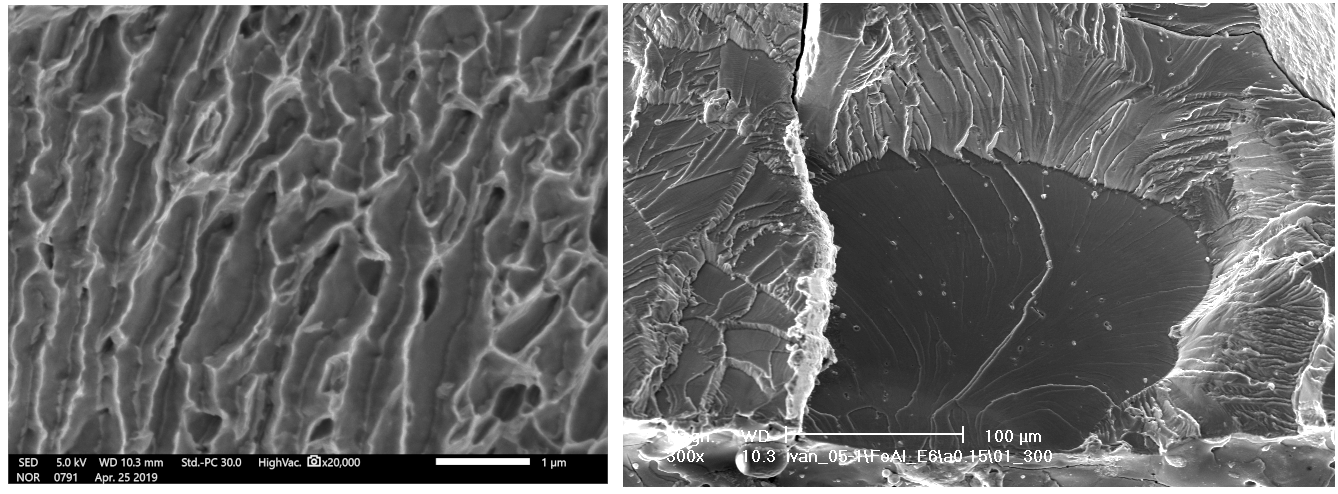

We have several hundred X-ray images in various resolutions, divided into two categories. The goal is to create classifier. The challenge is that each image has different dimensions. The dataset is approximately balanced.

We calculated the **normalized histogram** of the grayscale distribution for each image, which will serve as input. The dataset can be downloaded [here](https://drive.google.com/file/d/1p3ikI1ow4lwlVZKaL6bQcFRiyhQOmMaR/view?usp=sharing)

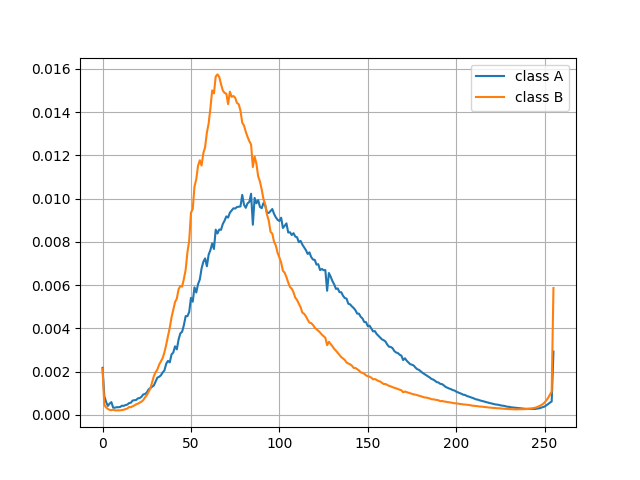

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
df = pd.read_csv("histograms.csv")
X = np.array(df["histogram"].tolist())
y= np.array(df["class"].tolist())
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)


**We often have multiple competing models, which differ in terms of data transformations, parameter choices, or even the algorithms themselves.** Since we need to compare these models without writing overly complicated code, we can link the individual tasks together using a [pipeline](https://scikit-learn.org/1.5/modules/generated/sklearn.pipeline.Pipeline.html). Pipelines allow us to assemble the entire process of data transformation and model training into a single object, which provides methods like fit(), predict(), and score() (the score corresponds to the scoring function for the classifier in the pipeline) and encapsulates both data transformations and learning.

**Pipelines combine data transformations and model training into one object.**

They provide key methods like:

* *fit()* – for training
* *predict()* – for making predictions
* *score()* – for evaluating the model

Pipelines encapsulate both data transformations and the learning process for simplicity and efficiency.

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer  # three types of scaling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
import pandas as pd
import warnings
warnings.filterwarnings('ignore')  # suppress warnings

# parameters
seed = 42


# create pipelines
pipe_sc_lr = Pipeline([('scaler', StandardScaler()), ('classifier', LogisticRegression())])
# StandardScaler + Logistic Regression: scales data to mean=0 and variance=1, then applies logistic regression.

pipe_sc_knn = Pipeline([('scaler', StandardScaler()), ('classifier', KNeighborsClassifier(n_neighbors=3))])
# StandardScaler + KNN: scales data and applies K-Nearest Neighbors classifier with 3 neighbors.

pipe_mm_lr = Pipeline([('scaler', MinMaxScaler()), ('classifier', LogisticRegression())])
# MinMaxScaler + Logistic Regression: scales data between 0 and 1, then applies logistic regression.

pipe_mm_knn = Pipeline([('scaler', MinMaxScaler()), ('classifier', KNeighborsClassifier(n_neighbors=3))])
# MinMaxScaler + KNN: scales data between 0 and 1, then applies K-Nearest Neighbors classifier.

pipe_norm_lr = Pipeline([('scaler', Normalizer()), ('classifier', LogisticRegression())])
# Normalizer + Logistic Regression: normalizes each sample (row) to unit norm, then applies logistic regression.

pipe_norm_knn = Pipeline([('scaler', Normalizer()), ('classifier', KNeighborsClassifier(n_neighbors=3))])
# Normalizer + KNN: normalizes each sample to unit norm, then applies K-Nearest Neighbors classifier.

pipe_sc_rf = Pipeline([('scaler', StandardScaler()), ('classifier', RandomForestClassifier(n_estimators=50, random_state=seed))])
# StandardScaler + RandomForest: scales data and applies a RandomForest with 50 estimators (trees).

# create a list of pipelines
pipes = {
    "pipe_sc_lr": pipe_sc_lr,  # Logistic Regression with StandardScaler
    "pipe_sc_knn": pipe_sc_knn,  # KNN with StandardScaler
    "pipe_mm_lr": pipe_mm_lr,  # Logistic Regression with MinMaxScaler
    "pipe_mm_knn": pipe_mm_knn,  # KNN with MinMaxScaler
    "pipe_norm_lr": pipe_norm_lr,  # Logistic Regression with Normalizer
    "pipe_norm_knn": pipe_norm_knn,  # KNN with Normalizer
    "pipe_sc_rf": pipe_sc_rf  # RandomForest with StandardScaler
}

**We use [cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html) to avoid the situation where the training data happens to be "good" and the test data "bad"** (or vice versa). This involves repeatedly splitting the dataset into training and test sets (called folds), ensuring the model doesn't perform well by chance but fails in practice. A common method is [K-fold validation](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-evaluating-estimator-performance). More information on cross-validation can be found here.

In [ ]:
from sklearn.model_selection import train_test_split  # splits the data
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score  # for automated evaluation

results = {}
# automate evaluation
for k, pipe in pipes.items():  # for each pipeline
    results[k] = cross_val_score(pipe, X_tr, y_tr, cv=5)  # 5-fold cross-validation

# create a dataframe for evaluation
results = pd.DataFrame(data=results)
results.head()  # print the success rates for each fold

pipe_sc_lr  pipe_sc_knn  pipe_mm_lr  pipe_mm_knn  pipe_norm_lr  \
0    0.975694     0.982639    0.979167     0.996528      0.937500   
1    0.968750     0.972222    0.961806     0.975694      0.940972   
2    0.951220     0.965157    0.961672     0.972125      0.940767   
3    0.975610     0.989547    0.975610     0.996516      0.972125   
4    0.940767     0.972125    0.930314     0.982578      0.916376   

   pipe_norm_knn  pipe_sc_rf  
0       0.993056    0.972222  
1       0.972222    0.968750  
2       0.975610    0.958188  
3       0.993031    0.986063  
4       0.982578    0.968641

In [ ]:
results.describe().head()  # print the average success rate of training

pipe_sc_lr  pipe_sc_knn  pipe_mm_lr  pipe_mm_knn  pipe_norm_lr  \
count    5.000000     5.000000    5.000000     5.000000      5.000000   
mean     0.962408     0.976338    0.961714     0.984688      0.941548   
std      0.015689     0.009668    0.019259     0.011437      0.019912   
min      0.940767     0.965157    0.930314     0.972125      0.916376   
25%      0.951220     0.972125    0.961672     0.975694      0.937500   

       pipe_norm_knn  pipe_sc_rf  
count       5.000000    5.000000  
mean        0.983299    0.970773  
std         0.009647    0.010036  
min         0.972222    0.958188  
25%         0.975610    0.968641

 # Brief overview of classification and regression models (Selfstudy)



## Classification
 The goal of classification is to divide elements (data points) into predefined groups. We distinguish between *binary classification*, where we divide data into only two classes, or *multiclass classification*, where data can belong to more than two classes. In the tasks mentioned above, each element belongs to exactly one class. Another option is that elements can belong to multiple classes at once, in which case it is referred to as a *multilabel task*.

In classification, classes are usually numbered. In the case of binary classification, we have two options, typically 0 and 1. In the case of n classes, the values are $0,1, \ldots, n-1$. The classifier returns one of these values. Depending on the algorithm, it can also provide the "probability" of belonging to a particular class. In binary classification, one number is sufficient for a given element since the law of the excluded middle applies (the element belongs to class 0 or 1). In the case of multiple classes, we have the probability of belonging to more than one class.

Classification tasks involving multiple classes can be solved either through using specialized algorithms (KNN, Naive Bayes algorithm) or by repeated binary classification.

## Multiclass Classification
When dealing with more than two classes ($n > 2$), we move beyond binary classification. In this case, we need to consider which classifier we are using. Some classifiers, such as the Naive Bayes classifier or k-Nearest Neighbors (k-NN), can be directly applied to multiclass problems without modification. However, for algorithms that are inherently binary, we must construct several binary classifiers and use their decisions to determine class membership.

There are two main strategies for handling multiclass problems:

* **One-Versus-Rest** (O-V-R), also known as **One-Versus-All** (O-V-A):
In this approach, we build $n$ classifiers, where each classifier determines membership for one of the $n$ classes. The final prediction is the class with the highest confidence score. Algorithms that can measure confidence, such as Logistic Regression, work well with this strategy. This method is implemented in the library [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html#sklearn.multiclass.OneVsRestClassifier).

* **One-Versus-One** (O-V-O):
Here, classifiers are built for every pair of classes, resulting in $\frac{n(n-1)}{2}$ classifiers. The class that receives the most votes from all pairwise comparisons is chosen as the final prediction. While this approach involves training more classifiers than O-V-R, it is often used with methods like Support Vector Machines (SVM), which may struggle with large datasets. O-V-O reduces the size of the dataset each binary classifier needs to handle. You can find more details in the [scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsOneClassifier.html).
A detailed explanation of the algorithm is available [here](https://www.sciencedirect.com/science/article/pii/S002002551631043X#sec0013).

## Logistic Regression
In linear regression, we seek a model in the form:
$y \approx X \cdot w + b$ where $w$ are the weights we aim to find, and $b$ is the bias, whose effect is to shift the separating line (or plane), as illustrated below.

Sometimes the form:$y \approx X \cdot w $ is used. In this case, the bias is not considered separately, but the matrix $X$ is extended by a column of ones, i.e., $X = (\overline{1}, X)$, and the corresponding weight vector $w$ has one more dimension than in the previous case.

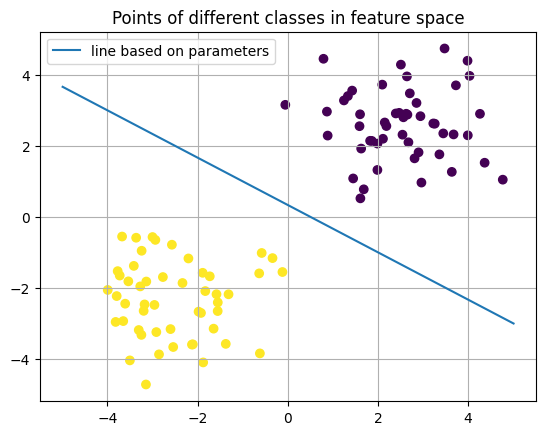

In [ ]:
#@title  { run: "auto", vertical-output: true }
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

# generating points
X, y = make_blobs(n_samples=100, centers=[(2.5,2.5),(-2.5,-2.5)], n_features=2, random_state=0)

min1, max1 = X[:,0].min(), X[:,0].max()
min2, max2 = X[:,1].min(), X[:,1].max()

w_1 = -0.2  #@param {type:"slider", min:-1, max:1, step:0.1}
w_2 = -0.3  #@param {type:"slider", min:-1, max:1, step:0.1}
bias = 0.4  #@param {type:"slider", min:-1, max:1, step:0.1}

x_1 = np.arange(min1-1, max1+1)  # x-axis for lines
x_2_mov = -w_1/w_2 * x_1 + (bias - 1/2) / w_2  # line determined by sliders

plt.scatter(X[:,0], X[:,1], c=y)
plt.plot(x_1, x_2_mov, label='line based on parameters')
plt.grid()
plt.title("Points of different classes in feature space")
plt.legend()
plt.show()


### Logistic Regression for Classification
If we want to determine the probability of belonging to a specific class, we need to transform the value $\hat{y}$ to the interval $<0,1>$.

This can be done using the logistic function, also known as the sigmoid function, $f(x) = \frac{1}{1+e^{-x}}$. The behavior of this function is shown in the graph below.

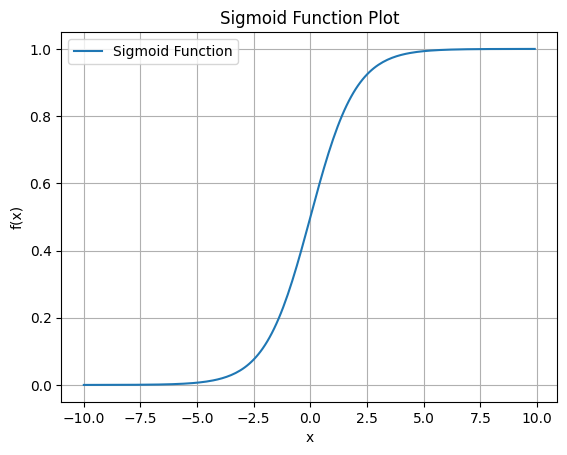

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generating values for the sigmoid function
xsigmo = np.arange(-10, 10, 0.1)
ysigmo = 1 / (1 + np.exp(-xsigmo))

# Plotting the sigmoid function
plt.plot(xsigmo, ysigmo, label='Sigmoid Function')
plt.legend()
plt.grid()
plt.title('Sigmoid Function Plot')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

We substitute the result of the product
𝑤
⋅
𝑥
 into the sigmoid function, giving us the probability that the element belongs to the class labeled 1:
 \begin{equation} \hat{y} = \frac{1}{1+e^{-w\cdot x}}.
 \end{equation}

Logistic Regression Using Least Squares
We will minimize the difference between the predicted probability of class membership and the actual value. The minimized function for the formulation in terms of the least squares method is as follows:
 \begin{equation} \min_{w} || y-\frac{1}{1+e^{-X\cdot w }}||^2. \end{equation}

 Note that we are using a vectorized formulation here, meaning
𝑤
 is a vector,
𝑋
 is a matrix of examples, and
$||u||=\sqrt{\sum_i u_i^2}$
  represents the norm of the given vector. For the actual minimization of the criterion (loss) function, we use the [SciPy](https://scipy.org/) library. We could also proceed by programming our own optimization algorithm.

**Note:**
Regularization is often performed, where we also add another term to the criterion function that affects the final size of the weights
𝑤. The criterion function then looks as follows:¨
 \begin{equation} \min_{w} || y-\frac{1}{1+e^{-w\cdot x}}||^2 + c ||w||^2, \end{equation} where the number
𝑐 is the regularization parameter (also hyperparameter).

In [ ]:
import numpy.linalg as la # for calculating the norm
import scipy.optimize as optimize # for calculating the minimum of the criterion function

class NaiveLogisticRegressionBinary:
    def __init__(self):
        self._w = None
        self._X = None
        self._y = None

    def sigmoid(self, w, X):
        """
        Helper method for calculating the sigmoid
        """
        return 1.0/(1.0 + np.exp(-X @ w))

    def criterion_function(self, w):
        """
        The minimized function
        """
        return la.norm(self._y - self.sigmoid(w, self._X))

    def fit(self, X, y):
        """
        Training the model. The training uses the scipy library and
        the optimization tools it contains.
        """
        dimension = X.shape[1] + 1
        rows = X.shape[0]
        # Prepare the data - adding a column of ones for bias
        self._X = np.hstack((np.ones((rows, 1)), X)) # add ones
        self._y = y
        # An iterative optimization method is used, starting with a random initial guess
        w0 = np.random.randn(dimension) # random starting point
        self._w = w0
        print(f"Initial value of the criterion function {self.criterion_function(w0)}")
        print(f"Initial weight values w={w0}")
        res = optimize.minimize(self.criterion_function, w0, method='BFGS', tol=1e-5)
        self._w = res.x
        print(f"Final value of the criterion function {self.criterion_function(self._w)}")
        print(f"Final weight values w={self._w}")
        return self._w

    def predict_proba(self, X):
        """
        Calculate the probability of class membership
        """
        return self.sigmoid(self._w, np.hstack((np.ones((X.shape[0], 1)), X)))

    def predict(self, X, threshold=0.5):
        """
        Predict the specific class based on probability.
        """
        probability = self.predict_proba(X)
        return 1 * (probability > threshold)


In [ ]:
from sklearn.metrics import classification_report

# Using the designed class
model = NaiveLogisticRegressionBinary()
model.fit(X, y)  # Training the model

# Using it for prediction
y_hat = model.predict(X)
print(classification_report(y, y_hat))


Initial value of the criterion function 3.0440377223265433
Initial weight values w=[-0.5278846  -0.72218241  0.23425057]
Final value of the criterion function 7.931861663210949e-06
Final weight values w=[ 2.0201725  -6.34939809 -7.17140059]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



## Decision Trees
Decision trees are a **supervised machine learning algorithm suitable for both classification and regression**. Their construction involves creating simple rules that divide the feature space into smaller and smaller regions, such that the target variable—be it a class for classification or a predicted value—is nearly constant within each region.

In the image below on the left, there is an example of a decision tree for classification, for instance, to determine whether a customer will buy a computer. We see that the depth of the tree is two. The tree is not binary because it has multiple branches at the first level. In the second image on the right, a function approximation using a decision tree is shown, indicating the use of a decision tree for a regression task. The depth of the tree is again two. Note that the number of values used to approximate the variable on the $y$-axis is four, corresponding to a binary tree of depth two.

Classification | Regression
- | -
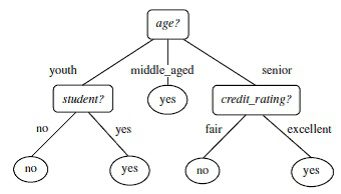|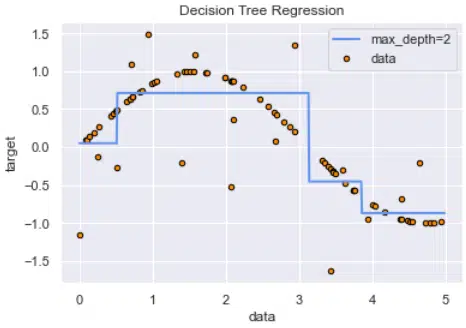
source: https://www.kdnuggets.com/2016/10/decision-trees-concise-technical-overview.html | source: https://www.jcchouinard.com/regression-in-machine-learning/#dt_reg

One of the fundamental properties of trees is that they are non-parametric, except for the desired depth of the tree. Advantages of trees include their low requirements for various data modifications, such as scaling, and their ability to work with both categorical and numerical data. They are easily interpretable, as we know the rule (the path in the tree and the values of the features) that led to a given decision.

On the other hand, they also have disadvantages. An example is sometimes poor generalization ability when constructing trees of large depths. By generalization, we mean that the algorithm performs well on training data but has significantly worse success on test data (unknown). Thus, the model behaves more like a memory, and proper learning has not occurred. Due to sensitivity to unbalanced data, i.e., when there is a significant imbalance between the number of representatives of the classes, the tree tends to be biased toward the more frequent classes. Additionally, trees can be sensitive to changes in data, meaning that a small change in the training data can lead to the construction of a very different tree.

A variety of algorithms are used to construct trees:

* Iterative Dichotomiser 3 - [ID3](https://en.wikipedia.org/wiki/ID3_algorithm)
* [C4.5](https://en.wikipedia.org/wiki/C4.5_algorithm)
* Classification And Regression Tree - [CART](https://www.researchgate.net/profile/Dan-Steinberg/publication/265031802_Chapter_10_CART_Classification_and_Regression_Trees/links/567dcf8408ae051f9ae493fe/Chapter-10-CART-Classification-and-Regression-Trees.pdf)
In the following sections, we will only familiarize ourselves with the principles of decision trees. For practical use, we will employ the [sklearn](https://scikit-learn.org/stable/modules/tree.html) library.

### Principles of Decision Tree Construction

In the following, we will proceed according to [Sebastian Raschka](https://sebastianraschka.com/blog/2021/ml-course.html#part-3-tree-based-methods) and his book [Python Machine Learning, 3rd Edition](https://sebastianraschka.com/books/#python-machine-learning-3rd-edition).

Impurity
The principle of constructing decision trees is that we sequentially add individual splitting criteria (nodes) to the tree so that the newly created subsets are as homogeneous as possible, meaning that one of the $c$ classes is maximally represented. If we want to characterize whether the elements of a certain subset $m$ are homogeneous, we must determine its impurity.

Three metrics can be used for this purpose:

Entropy: \begin{equation} I_H(m) = -\sum_{i=1}^c p(i|m)\log_2(p(i|m)), \end{equation} where $p(i|m)$ represents the probability (actual frequency) of class $i$ in subset $m$. The negative sign is used because probabilities $p(i|m) \le 1$, and thus the logarithm is negative. Furthermore, for the case $p(i|m) = 0$, meaning that a class is not represented in $m$ at all, we define $p(i|m)\log_2(p(i|m)) = 0$. In the case of two or more classes, entropy is maximized when the classes are uniformly represented in $m$. Conversely, if there are only elements of one class in $m$, the entropy is zero. In the example below, normalization is also added since the maximum $I_H(m) = 1$.

Gini impurity: \begin{equation} I_G(m) = -\sum_{i=1}^c p(i|m)(1-p(i|m)) = 1 - \sum_{i=1}^c p(i|m)^2. \end{equation} Again, as with entropy, it is maximized when representatives of individual classes are uniformly represented in $m$ and zero when $m$ is homogeneous. Its behavior is similar to that of entropy, as shown in the example below.

Another example can be impurity based on classification error: \begin{equation} I_E(m) = 1 - \max_{i=1,\ldots,c}(p(i|m)). \end{equation} It is clear that if the set $m$ is homogeneous, then $I_E(m) = 0$. This defined impurity has no derivative at its maximum, which may cause problems during numerical optimization.

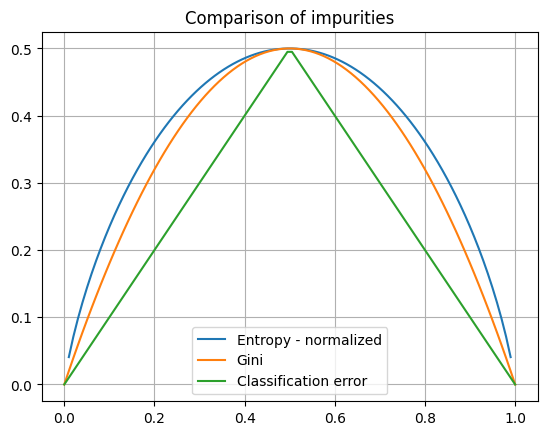

In [ ]:
# The course of individual impurities for two classes
import matplotlib.pyplot as plt
import numpy as np

p = np.linspace(0, 1, 100)  # generate probabilities from 0 to 1
Ih = -(p * np.log2(p) + (1 - p) * np.log2(1 - p))
Ig = 1 - (p**2 + (1 - p)**2)
Ie = 1 - np.maximum(p, 1 - p)
plt.plot(p, Ih / 2, label="Entropy - normalized")
plt.plot(p, Ig, label="Gini")
plt.plot(p, Ie, label="Classification error")
plt.title("Comparison of impurities")
plt.grid()
plt.legend()


### Criterion Selection for Splitting

In the following, we consider the construction of a binary classification tree, where each parent node $D_p$ of the tree has at most two children
$D_{p,L}$ (left) and $D_{p,R}$  (right). When constructing the tree, we add a condition of the form whether the feature
$f$ has the value
$\nu_f$ . This leads to the gradual traversal of all features, and for each feature, all its possible values
$\nu_f$  are tested. The split that maximizes the so-called **information gain** is selected:
\begin{equation}
IG(D_p,f,\nu_f) = I(D_p) - \frac{\#D_{p,L}}{\#D_p}I(D_{p,L})-\frac{\#D_{p,R}}{\#D_p}I(D_{p,R}),
\end{equation} where

$I(.)$ denotes the impurity of the respective child (L, R). The terms $\frac{\#D_{p,L}}{\#D_p}$ and $\frac{\#D_{p,R}}{\#D_p}$ represent the weights for impurity, since
$\#D_{p,L}$, and $\#D_{p,R}$  denote the number of elements in the respective children, and
 $\#D_p$   denotes the number of elements in the parent. Thus, by gradually adding conditions, impurity is reduced. The algorithm prefers the quickest reduction in impurity.

**Note**
The procedure outlined above roughly corresponds to the ID3 algorithm, which is designed for discrete values of individual attributes. In the case of continuous values of a given attribute, one can either discretize the values or use the CART algorithm.

### Tree Pruning
Decision trees have one major drawback—they tend to **overfit**, see example with MNIST datase classification. If we don't limit the tree's depth, the algorithm may behave like a memory for the training data. Very deep trees can form, where the resulting [leaves](https://cs.wikipedia.org/wiki/List_(graf) contain only single-element sets. This often leads to the situation where the algorithm performs well on the training data, but significantly worse on the test data, as explained [here]((http://www.cs.cmu.edu/~awm/15781/slides/DTreesAndOverfitting-9-13-05.pdf).

Essentially, there are two approaches to deal with this. Either **pre-pruning** is applied, meaning the maximum depth of the tree is set, and the tree is not allowed to grow deeper than this limit. The second option is **post-pruning**, where the tree is first fully constructed, and then some branches (rules) are gradually pruned back to improve generalization.

This prevents the model from overfitting the training data and ensures better performance on unseen test data.

### Using Regression Trees
In the example below, a regression tree is used to approximate a periodic function. The tree is trained on the interval $<0, 2\pi>$, where it produces satisfactory results. However, when the model is shifted to the interval $<2\pi, 4\pi>$, it becomes evident that the approximation is poor.

This highlights one of the limitations of decision trees in regression tasks: they tend to struggle with extrapolation beyond the training data, especially for functions with repeating or periodic patterns.

Text(0.5, 1.0, 'Regression in the interval <2 pi,4 pi>')

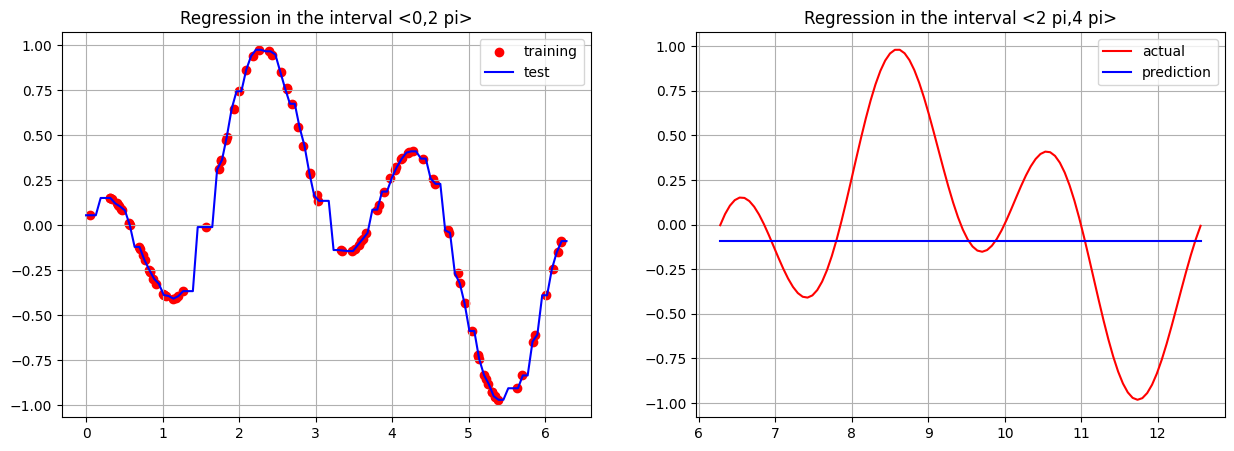

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Definition of the "unknown" function
def f(x):
  return np.sin(2*x)*np.cos(x+1)

# Preparing data
X_tr = 6.28 * np.random.rand(100, 1)  # Generate training data in the interval <0,2pi>
y_tr = f(X_tr)

X_test = np.linspace(0, 6.28, 100).reshape(100, 1)
X_test_shift = np.linspace(6.28, 2*6.28, 100).reshape(100, 1)

# Training the tree and making predictions
reg = DecisionTreeRegressor(criterion="absolute_error")  # Using a different criterion
reg.fit(X_tr, y_tr)
y_test = reg.predict(X_test)
y_test_shift = reg.predict(X_test_shift)

# Plotting results
plt.rcParams['figure.figsize'] = [15, 5]
figure, axis = plt.subplots(1, 2)

axis[0].scatter(X_tr, y_tr, label="training", color='r')
axis[0].plot(X_test, y_test, label="test", color='b')
axis[0].grid()
axis[0].legend()
axis[0].set_title("Regression in the interval <0,2 pi>")

axis[1].plot(X_test_shift, f(X_test_shift), label="actual", color='r')
axis[1].plot(X_test_shift, y_test_shift, label="prediction", color='b')
axis[1].grid()
axis[1].legend()
axis[1].set_title("Regression in the interval <2 pi,4 pi>")


## Ensemble Trees and Forests
The principles discussed here can also be applied to algorithms other than trees. The basic idea is that two heads are better than one, meaning that we will use multiple trees (heads). By grouping multiple classifiers together, it becomes less critical if one classifier is not particularly successful; as a whole, the ensemble of classifiers tends to perform well and, importantly, reduces overfitting. Note that this approach can be applied not only to classification tasks but also to regression problems.

In general, we distinguish between two ensemble methods: **bagging** and **boosting**. Both approaches are frequently used, as demonstrated in [sklearn](https://scikit-learn.org/stable/modules/ensemble.html).

### Bagging - Bootstrap Aggregating
In the case of bagging, the entire dataset $D$ is randomly divided into smaller datasets $D_i$ such that $D=\cup_{i}D_i$, and for some pairs, $D_i \cap D_j \neq \emptyset$. On each of these subsets, a separate classifier is trained. Unlike boosting (discussed below), the classifiers in bagging are independent of one another, meaning they can be trained in parallel. The final classification is determined by majority voting among the individual classifiers. More details can be found [here](https://en.wikipedia.org/wiki/Bootstrap_aggregating). An example of this approach is the well-known [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) algorithm.

#### Feature Selection in Bagging:
In Random Forests, not only is the data split into subsets, but for each decision tree, a random subset of features is also selected. This reduces the correlation between trees and further improves the performance of the ensemble. The model selects features randomly at each split, creating a diverse set of trees.

### Boosting
Boosting takes a different approach: the dataset $D$ is again randomly divided into smaller datasets $D_i$, but now the division happens sequentially. First, $D_1$ is constructed, and the first classifier is trained on it. Some of the examples from $D$ that the first classifier misclassifies are added to $D_2$ with increased importance (weights). The second classifier is then trained on $D_2$. This process repeats for a set number of iterations. **Weak classifiers** (e.g., shallow trees) are typically used, and each subsequent classifier focuses on the errors made by the previous one. The final decision is made by a weighted sum of the individual classifiers, where the weight is determined by the classifier's success during training.

Examples of boosting algorithms are [AdaBoost](https://en.wikipedia.org/wiki/AdaBoost) and [Gradient Tree Boosting](https://en.wikipedia.org/wiki/Gradient_boosting). These and other boosting techniques are implemented in the [sklearn](https://scikit-learn.org/stable/modules/ensemble.html) library.

#### Feature Selection in Boosting:
Boosting methods like Gradient Boosting do not randomly select features for each tree, but important features are given more attention as the model adapts to the data. By focusing on difficult-to-predict examples, the algorithm implicitly prioritizes features that are most helpful for correcting errors from previous rounds of training.








## Support Vector Machines (SVM)
Support Vector Machines (SVM) is one of the classic methods in machine learning. It extends the concept of linear classifiers by introducing the idea of a margin. SVM is applicable and effective even for problems that are not linearly separable. Compared to neural networks, it is also less computationally demanding.

### Hard Margin Formulation
Let's first assume we have data that is linearly separable. Again, let $x_i$ represent data points and $y_i$ their corresponding labels, where $y_i=\pm1$. In the figure below, we depict a scenario where we aim to separate individual points with a hyperplane $w^T \cdot x + b=0$, similar to linear classifiers. However, the difference is that we now try to maximize the margin, the area between the boundary lines, where no points exist in the feature space. Points that lie on the boundary lines are called **support vectors**, giving the method its name. The term hard margin is used because no points are allowed on the wrong side of the margin boundary.

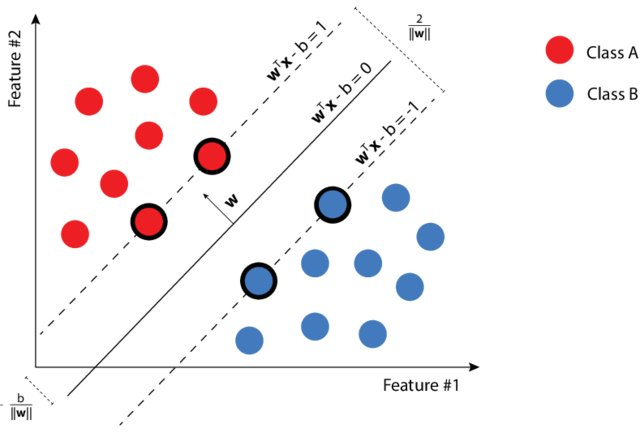

### Mathematical Formulation
The margin width $d$ is determined by the weights $w$, such that $d=\frac{2}{||w||}$, as explained [here](https://www.csd.uwo.ca/~xling/cs860/papers/SVM_Explained.pdf). Since we want to maximize the margin, the problem can be formulated by minimizing the function $\frac{||w||^2}{2}$, meaning we minimize the inverse value instead of maximizing it. The square in the numerator serves the same purpose as in the least squares method, to avoid the square root in the definition of the norm. Additionally, we require that the points lie above or below the hyperplane, meaning for $y_i=+1$ we have $w^T\cdot x_i +b\ge+1$, and for $y_i=-1$ it holds that $w^T\cdot x_i +b\le-1$. Both of these conditions can be written as $y_i(w^T\cdot x_i +b)-1\ge0$.

This leads to a [quadratic programming problem]((https://cs.wikipedia.org/wiki/Kvadratick%C3%A9_programov%C3%A1n%C3%AD)):
 \begin{align} &\min \frac{||w||^2}{2} \ \text{subject to}\ &y_i(w^T\cdot x_i +b)-1\ge0, \end{align} where the unknowns are $w$ and $b$. In practice, the dual formulation of this problem is often used, as explained [here](https://www.csd.uwo.ca/~xling/cs860/papers/SVM_Explained.pdf), which is a maximization problem for the dual variables $\alpha_i$.

\begin{align} &\max \sum_i\alpha_i - \frac{1}{2}\sum_{i,j}\alpha_i\alpha_j y_i x_i \cdot x_j y_j \ \text{subject to}\ &\sum_i \alpha_i y_i=0\ &\alpha_i\ge0.\ \end{align}

From the dual variables, we can compute $w$ and $b$, as detailed [here](https://www.csd.uwo.ca/~xling/cs860/papers/SVM_Explained.pdf). For instance, the weights can be calculated as $w=\sum_i \alpha_i y_i x_i$.

Once we have determined the weights $w$ and $b$, classification is performed similarly to a linear classifier: \begin{equation} \hat{y}=\text{sign}(w^T \cdot x + b), \end{equation} or in the case of the dual formulation, we use the relation: \begin{equation} \hat{y}=\text{sign}(\sum_i \alpha_i y_i x_i \cdot x + b). \end{equation}

**Note I**

If you're wondering why the parallel planes are chosen at the level of $\pm 1$, it's essentially arbitrary where they are placed. The vector $w$ determines the slope of the hyperplane, and multiplying it by any non-zero constant does not affect the orientation of the plane. Therefore, the level $\pm 1$ is chosen for convenience.

**Note II**

Quadratic programming problems can be described using matrices, which appear both in the minimized function and in the system of constraints. For instance, the objective function $\frac{||w||^2}{2}$ can be written as $\frac{1}{2}w^T I w$, where $I$ is the identity matrix.

**Note III**

The dual formulation is advantageous both computationally and because it enables the so-called kernel trick (see below), which is an efficient way to apply non-linear transformations to the problem in a higher dimension, making the data easier to separate.

#### Naive Implementation - just for fun

Familiarize yourself with the [CVXOPT](https://cvxopt.org/) library, especially with how to define a [quadratic programming problem](https://cvxopt.org/userguide/coneprog.html#quadratic-programming).

A naive implementation of the primal formulation of this method **from scratch** using the quadratic programming solver from [CVXOPT](https://cvxopt.org/) is shown below. Compare it with the mathematical model. Specifically, think about how the problem is formulated in matrix notation. Most of the code involves generating the corresponding matrices that describe the quadratic programming problem, the *create_model_SVM_primary()* method, and passing them to the solver.

In [ ]:
!pip install cvxopt # install cvxopt

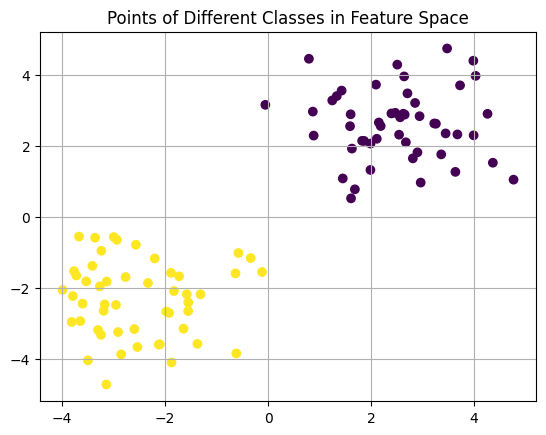

In [ ]:
# Syntetic data generation
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

dim = 2  # Dimension of the problem
samples = 100
X, y = make_blobs(n_samples=samples, n_features=dim, centers=[(2.5, 2.5), (-2.5, -2.5)], random_state=0)
y[y == 0] = -1  # Create classes -1/1

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.grid()
plt.title("Points of Different Classes in Feature Space")
plt.show()

In [ ]:
import cvxopt
from cvxopt import matrix, solvers
import numpy as np

# You need to understand CVXOPT - this is just to generate matrices for the QP problem
def create_model_SVM_primary(X, y):
    n, dim = X.shape  # Determine dimensions
    print(dim)

    # Generating matrices and vectors for the objective function
    # Generating matrix P - this is the matrix for the corresponding quadratic form
    P = np.identity(dim + 1)  # This is the identity matrix for the objective function I
    P[dim, dim] = 0  # Eliminate the coefficient for b

    # Generating vector q - vector of coefficients for the linear part of the objective function
    q = np.zeros(dim + 1)  # There is no linear term in the objective function, thus 0

    # Generating constraints
    h = -1 * np.ones((n, 1))
    G = np.ones((n, dim + 1))

    for i, (x, label) in enumerate(zip(X, y)):
        G[i, :dim] = -label * x  # Columns corresponding to w
        G[i, dim] = -label  # Column corresponding to b

    return matrix(P), matrix(q), matrix(G), matrix(h)

# Calling the method to generate the corresponding matrices
P, q, G, h = create_model_SVM_primary(X, y)
sol = solvers.qp(P, q, G, h)  # Calling the solver
w = sol['x']
print(w)


2
     pcost       dcost       gap    pres   dres
 0:  3.4433e-02  1.9256e+01  3e+02  2e+00  5e+02
 1:  2.6100e-01 -2.7233e+01  4e+01  3e-01  8e+01
 2:  3.5849e-01 -1.3024e+00  2e+00  1e-02  4e+00
 3:  3.2889e-01  2.3703e-01  9e-02  1e-04  3e-02
 4:  3.0276e-01  2.9302e-01  1e-02  1e-05  3e-03
 5:  3.0168e-01  3.0153e-01  1e-04  1e-07  4e-05
 6:  3.0166e-01  3.0166e-01  1e-06  1e-09  4e-07
 7:  3.0166e-01  3.0166e-01  1e-08  1e-11  4e-09
Optimal solution found.
[-5.88e-01]
[-5.08e-01]
[ 2.11e-01]



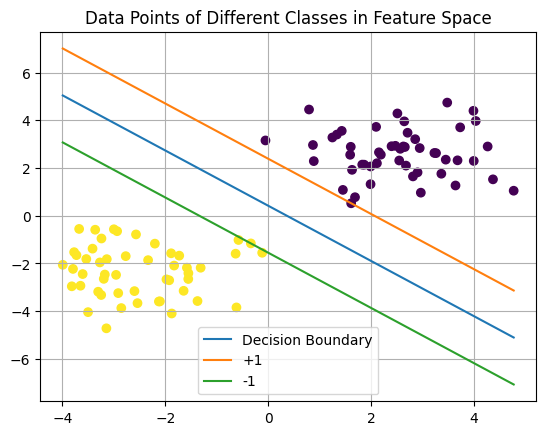

In [ ]:
# Visualization of results
left = np.min(X, axis=0)
right = np.max(X, axis=0)
xgr = np.linspace(left[0], right[0], 100)  # Generate x values for plotting the decision boundary
ygr = -(w[0] * xgr + w[2]) / w[1]  # Calculate the decision boundary
ygr_p1 = -(w[0] * xgr + w[2] + 1) / w[1]  # Calculate the boundary for the positive class (+1)
ygr_m1 = -(w[0] * xgr + w[2] - 1) / w[1]  # Calculate the boundary for the negative class (-1)

plt.scatter(X[:, 0], X[:, 1], c=y)  # Scatter plot of the data points
plt.plot(xgr, ygr, label='Decision Boundary')  # Plot the decision boundary
plt.plot(xgr, ygr_p1, label="+1")  # Plot the +1 class boundary
plt.plot(xgr, ygr_m1, label="-1")  # Plot the -1 class boundary
plt.grid()
plt.title("Data Points of Different Classes in Feature Space")
plt.legend()  # Add a legend
plt.show()  # Show the plot


### Soft Margin Formulation
The above formulation does not allow for the possibility that some points may not be classified correctly. The basic idea of the extension is to allow points to fall below the given boundary, as illustrated in the figure below. The value by which the i-th point may lie below the corresponding boundary is denoted as $\xi_i$, where $\xi_i \ge 0$.

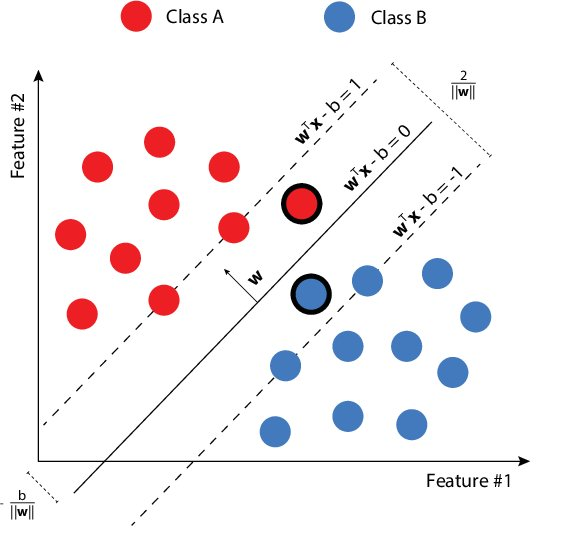

### Soft Margin - Mathematical Formulation
We start from the above idea of violating the condition that a point is above the corresponding boundary. Now, it can be below the edge with a margin of $\xi_i$, which will reflect in the constraints. For labels with the value $y_i=+1$, we want it to hold that $w^T \cdot x_i + b \ge +1 - \xi_i$, and for $y_i=-1$, it holds that $w^T \cdot x_i + b \le -1 + \xi_i$. This can again be written in the form $y_i(w^T \cdot x_i + b) - 1 + \xi_i \ge 0$.

Of course, we want the individual errors $\xi_i$ that the algorithm makes to be as small as possible. For this reason, we add a penalty term to the criterion function, giving us:
\begin{align}
&\min \frac{||w||^2}{2} + c \sum_i \xi_i \\
\mbox{subject to}\\
&y_i(w^T\cdot x_i +b)-1+\xi_i\ge0,
\end{align}
where the unknowns are $w$, $b$, and $\xi_i$, and $c$ is a constant that affects the penalty, known as a hyperparameter of the model. It is also possible to perform the dual formulation of this problem; see more [here](https://www.csd.uwo.ca/~xling/cs860/papers/SVM_Explained.pdf).

### Kernel Transformation - Kernelization
Data in a lower-dimensional space may not be linearly separable, but with an appropriate nonlinear transformation $\phi$ into a higher-dimensional space, they can be separated, as shown below.

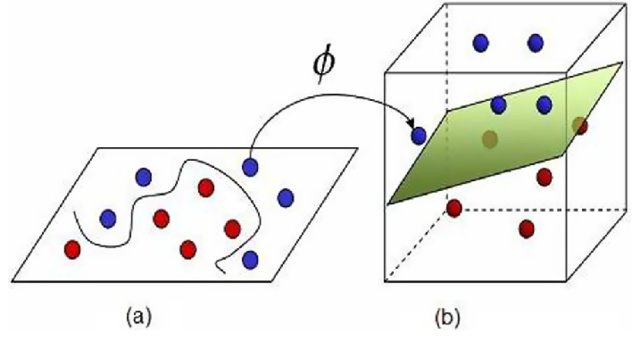

#### Examples of Kernels
Specific examples of kernels:



*   *Linear kernel*: $k(x_i, x_j) = x_i \cdot x_j$ - original formulation
*   *Polynomial kernel*: $k(x_i, x_j) = (x_i \cdot x_j +a)^b$
*   *RBF* (Radial Basis Function): $k(x_i, x_j) = e^{-\frac{(||x_i-x_j||^2)}{2\sigma^2}}$
*   *tanh like kernel*: $k(x_i, x_j) = \tanh(a x_i \cdot x_j +b)$


Detail [here]((http://crsouza.com/2010/03/17/kernel-functions-for-machine-learning-applications/#kernel_methods).

### SVM in the SKLEARN Library
In the [sklearn](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm) library, the SVM method is implemented in two ways. There is an implementation of [svc](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html), which allows for kernel transformations and implements a one-to-one method for multi-class classification, making it computationally intensive. According to the documentation, it is also based on a different optimization library and algorithm for solving quadratic programming problems, specifically [SMO](https://en.wikipedia.org/wiki/Sequential_minimal_optimization). The second model, [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC), mainly differs by using only a linear kernel, a different optimization library, and an algorithm for classification into multiple classes using the one-vs-rest approach, making it recommended in the documentation for large datasets.

The library also implements the use of the SVM method for regression with [SVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR) and [LinearSVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html#sklearn.svm.LinearSVR). The differences are similar to those in classification.

#Bibliography

 0)  [Machine Learning Course](https://developers.google.com/machine-learning/crash-course/classification/video-lecture).

1) [Blog](https://sebastianraschka.com/blog/2021/ml-course.html) of Sebastian Raschka [Python Machine Learning, 3rd Edition](https://sebastianraschka.com/books/#python-machine-learning-3rd-edition):

RASCHKA, Sebastian a Vahid MIRJALILI. Python machine learning: machine learning
and deep learning with Python, scikit-learn, and TensorFlow. Birmingham: Pack pub-
lishing, 2017. ISBN 978-1-78712-593-3.

2)  [An Introduction to Statistical Learning](https://www.statlearning.com/)

JAMES, Gareth, Daniela WITTEN, Trevor HASTIE a Robert TIBSHIRANI. An introduction to statistical learning: with applications in R. New York: Springer, [2013]. Springer texts in statistics, 103. ISBN 978-1461471370.
